In [1]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")
import requests
import matplotlib
import graphviz
import missingno as msno
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.neural_network import MLPClassifier as MLP
from sklearn import tree
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from math import sqrt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from collections import OrderedDict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
import pandas_profiling
import missingno

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.nunique()

#checking for unique values in order to decide which column to be retained and dropped.
#as per the below result customer ID has unique value for all and it has nothing to with analysis since its just like a name so on next stop dropping that particular column and procedding further.

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [4]:
df1 = df.drop("customerID", axis=1)

#created a new dataset after dropping a customer id column.

In [5]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df1.info()

#below result shows the datatype, non-null count.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
df1.isna().sum() # checking for missing values

#as per the below result there are no Missing Values.

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7043,3,No,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(f"Before Dropping Duplicates from Rows and Columns: ", df1.shape)
df1.drop_duplicates(inplace=True)
print(f"After Dropping Duplicates from Rows and Columns: ", df1.shape)

#dropping the duplicates to make the data more clear.

Before Dropping Duplicates from Rows and Columns:  (7043, 20)
After Dropping Duplicates from Rows and Columns:  (7021, 20)


In [10]:
for col in df1:
    print(col)
    print(df1[col].value_counts())
    print("-"*75)

gender
Male      3541
Female    3480
Name: gender, dtype: int64
---------------------------------------------------------------------------
SeniorCitizen
0    5880
1    1141
Name: SeniorCitizen, dtype: int64
---------------------------------------------------------------------------
Partner
No     3619
Yes    3402
Name: Partner, dtype: int64
---------------------------------------------------------------------------
Dependents
No     4911
Yes    2110
Name: Dependents, dtype: int64
---------------------------------------------------------------------------
tenure
1     591
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
---------------------------------------------------------------------------
PhoneService
Yes    6339
No      682
Name: PhoneService, dtype: int64
---------------------------------------------------------------------------
MultipleLines
No                  3368
Yes                 2

In [11]:
#the above result shows that Total Charges have some blank data and also it is stored as a object data type even though it is a float data type in nature.
# as a first step will be replacing the blank data with inputs
# and then convert the data type to float from object.
#converting the senior citizen data type also from numerical to object data type for better visualization and comparisson.

In [12]:
df1['TotalCharges'] = df1['TotalCharges'].replace(' ' , '0.0')
df1['TotalCharges'].value_counts()

0.0        11
19.75       9
20.2        8
19.65       7
19.9        7
           ..
8405        1
1536.75     1
1374.2      1
316.2       1
125.95      1
Name: TotalCharges, Length: 6531, dtype: int64

In [13]:
df1['TotalCharges'] = df1['TotalCharges'].astype('float')
df1['TotalCharges'].dtype

dtype('float64')

In [17]:
df1['SeniorCitizen'] = df1['SeniorCitizen'].replace('0' , 'No').astype('O')
df1['SeniorCitizen'] = df1['SeniorCitizen'].replace('1' , 'Yes').astype('O')
df1.SeniorCitizen

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7021, dtype: object

In [18]:
#finding the object data type (Categorical data) and numerical data type (continuous data)

In [19]:
# getting list of object data type columns
object_datatype = []
for x in df1.dtypes.index:
    if df1.dtypes[x] == 'O':
        object_datatype.append(x)
print(f"Object Data Type Columns are:\n", object_datatype)

# getting the list of numeric data type columns
number_datatype = []
for x in df1.dtypes.index:
    if df1.dtypes[x] == 'float64' or df1.dtypes[x] == 'int64':
        number_datatype.append(x)
print(f"\nNumber Data Type Columns are:\n", number_datatype)

Object Data Type Columns are:
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Number Data Type Columns are:
 ['tenure', 'MonthlyCharges', 'TotalCharges']


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   object 
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


# Visualization of the data

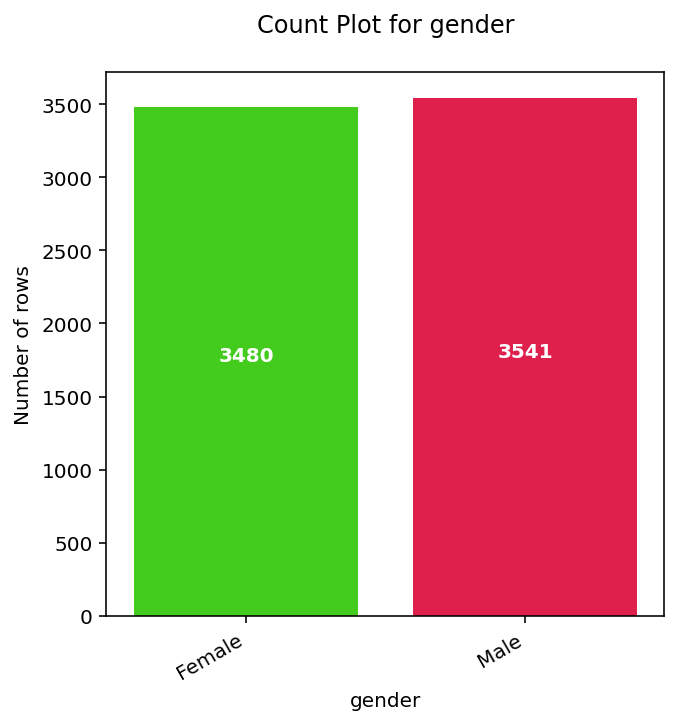

In [21]:
plt.style.use('seaborn-pastel')

try:
    plt.figure(figsize=(5,5))
    col_name = 'gender'
    values = df1[col_name].value_counts()
    index = 0
    ax = sns.countplot(df1[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation = 30, ha='right')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

#below data shows majority of the consumers are Male when compared to Female cosumers.

Error: '0'


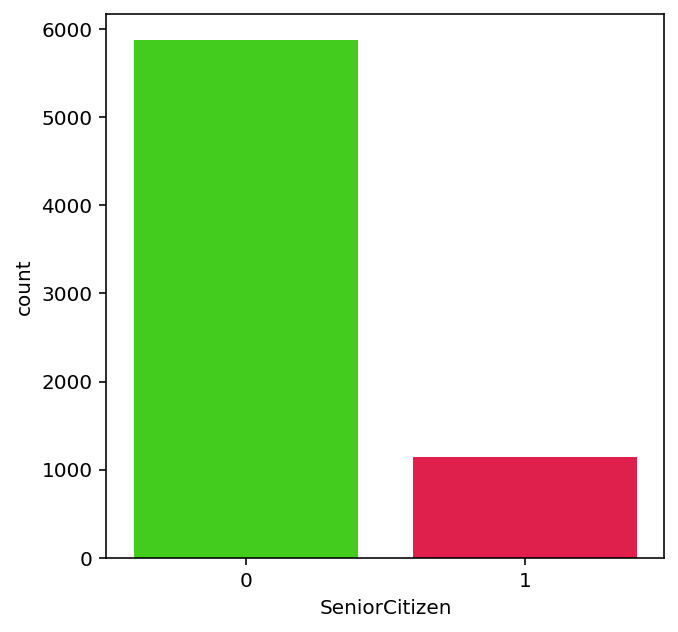

In [22]:
plt.style.use('seaborn-pastel')

try:
    plt.figure(figsize=(5,5))
    col_name = 'SeniorCitizen'
    values = df1[col_name].value_counts()
    index = 0
    ax = sns.countplot(df1[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation = 30, ha='right')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass


# Consider 0 as No & 1 as Yes. Which shows majority of the consumers are non-senior citizen.

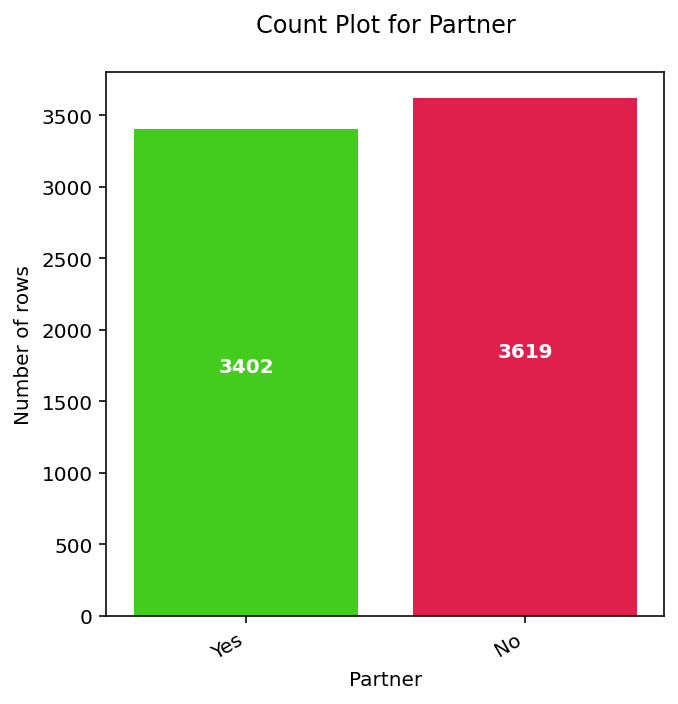

In [23]:
plt.style.use('seaborn-pastel')

try:
    plt.figure(figsize=(5,5))
    col_name = 'Partner'
    values = df1[col_name].value_counts()
    index = 0
    ax = sns.countplot(df1[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation = 30, ha='right')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass


# the below data shows most of the cosumer without partner compared to with partner consumer.

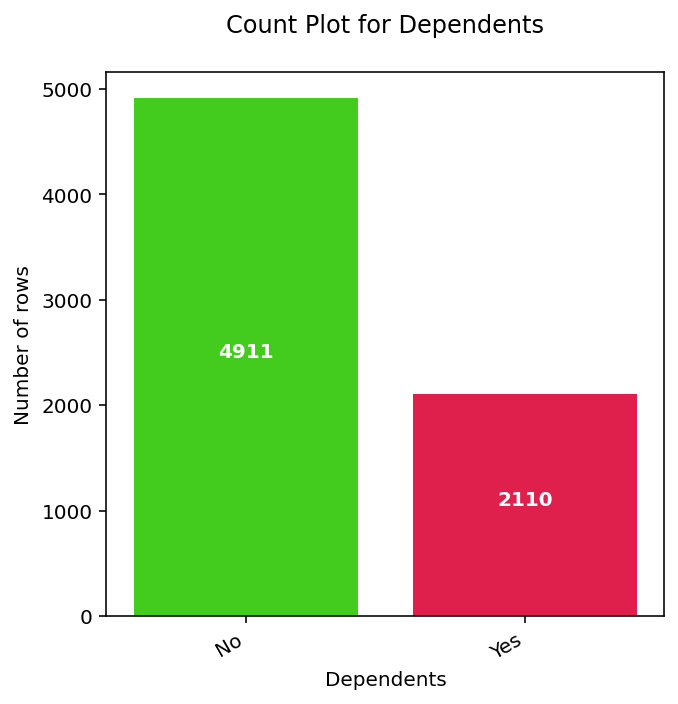

In [24]:
plt.style.use('seaborn-pastel')

try:
    plt.figure(figsize=(5,5))
    col_name = 'Dependents'
    values = df1[col_name].value_counts()
    index = 0
    ax = sns.countplot(df1[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation = 30, ha='right')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass


# the below data shows cosumers with No Dependents compared with Dependents.

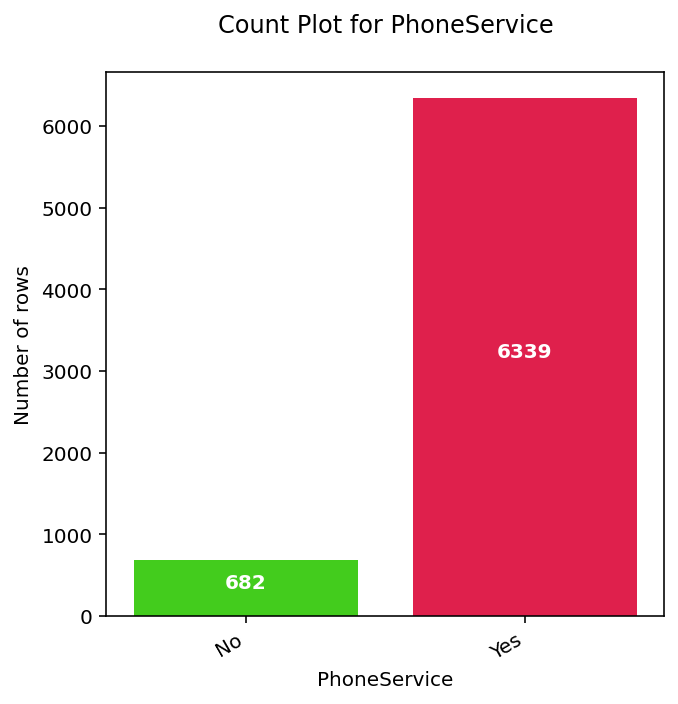

In [27]:
plt.style.use('seaborn-pastel')

try:
    plt.figure(figsize=(5,5))
    col_name = 'PhoneService'
    values = df1[col_name].value_counts()
    index = 0
    ax = sns.countplot(df1[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation = 30, ha='right')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass


# the below data shows cosumers with Phone Servies and without Phone Services

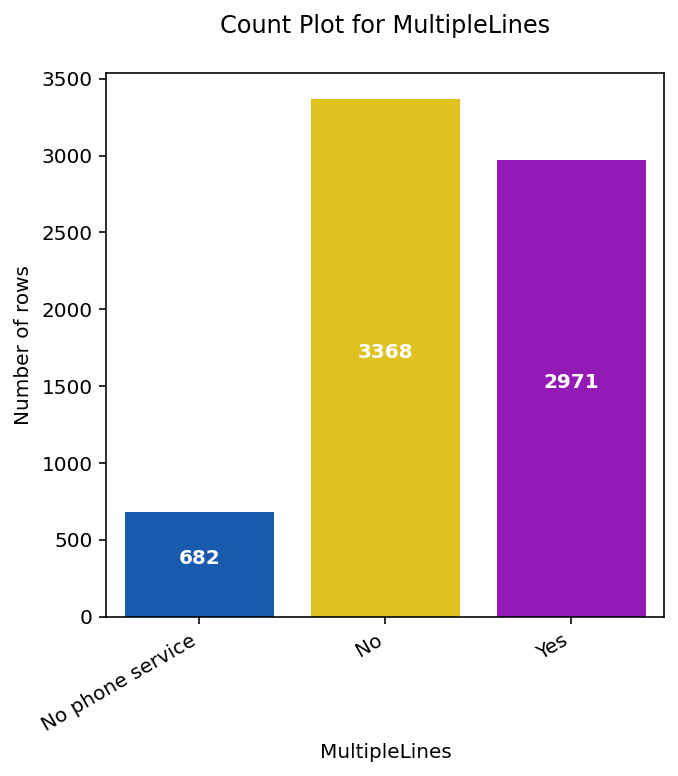

In [28]:
plt.style.use('seaborn-pastel')

try:
    plt.figure(figsize=(5,5))
    col_name = 'MultipleLines'
    values = df1[col_name].value_counts()
    index = 0
    ax = sns.countplot(df1[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation = 30, ha='right')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass


# the below data shows cosumers with Multiple lines of Phones.

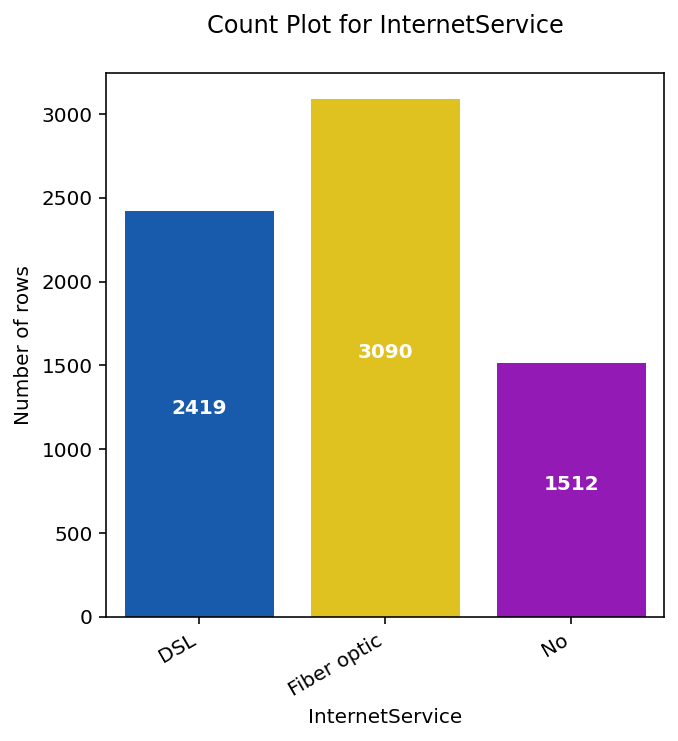

In [29]:
plt.style.use('seaborn-pastel')

try:
    plt.figure(figsize=(5,5))
    col_name = 'InternetService'
    values = df1[col_name].value_counts()
    index = 0
    ax = sns.countplot(df1[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation = 30, ha='right')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass


# the below data shows cosumers with Internet Service Types

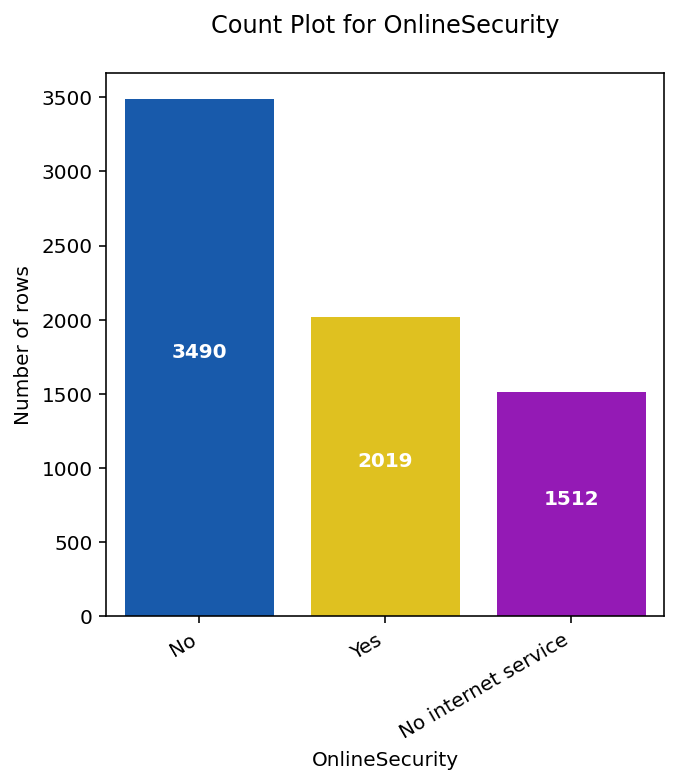

In [30]:
plt.style.use('seaborn-pastel')

try:
    plt.figure(figsize=(5,5))
    col_name = 'OnlineSecurity'
    values = df1[col_name].value_counts()
    index = 0
    ax = sns.countplot(df1[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation = 30, ha='right')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass


# the below data shows cosumers with Online Security Services

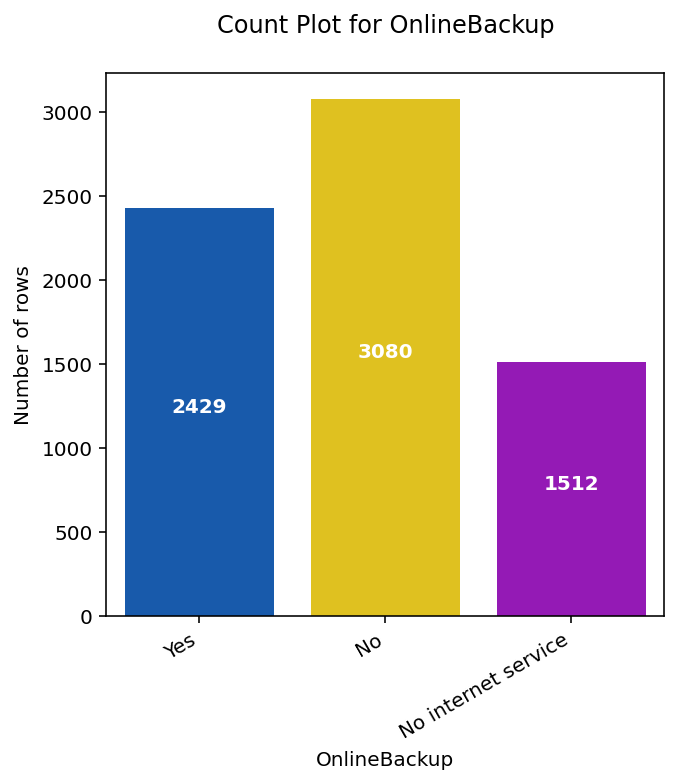

In [31]:
plt.style.use('seaborn-pastel')

try:
    plt.figure(figsize=(5,5))
    col_name = 'OnlineBackup'
    values = df1[col_name].value_counts()
    index = 0
    ax = sns.countplot(df1[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation = 30, ha='right')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass


# the below data shows cosumers with Online Backup Service

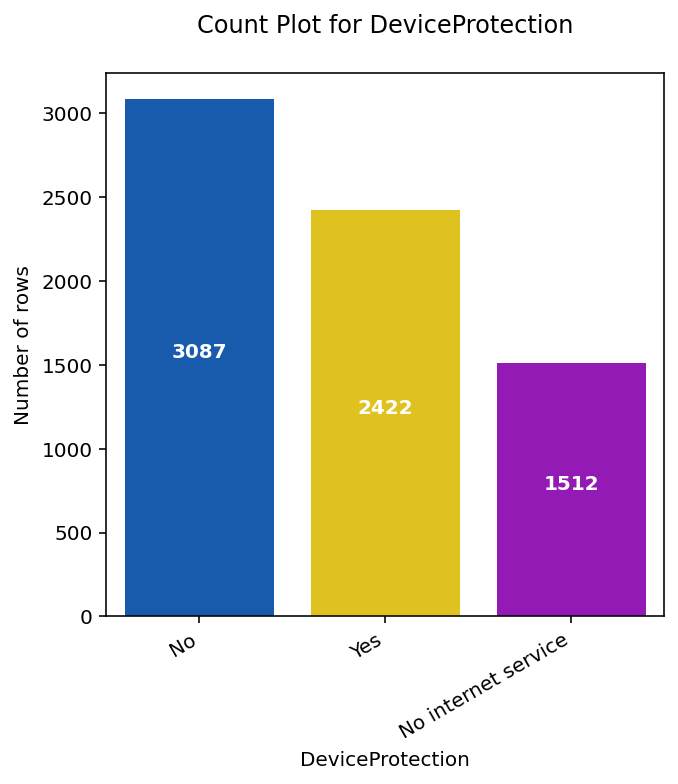

In [32]:
plt.style.use('seaborn-pastel')

try:
    plt.figure(figsize=(5,5))
    col_name = 'DeviceProtection'
    values = df1[col_name].value_counts()
    index = 0
    ax = sns.countplot(df1[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation = 30, ha='right')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass


# the below data shows cosumers with Device Protection Service

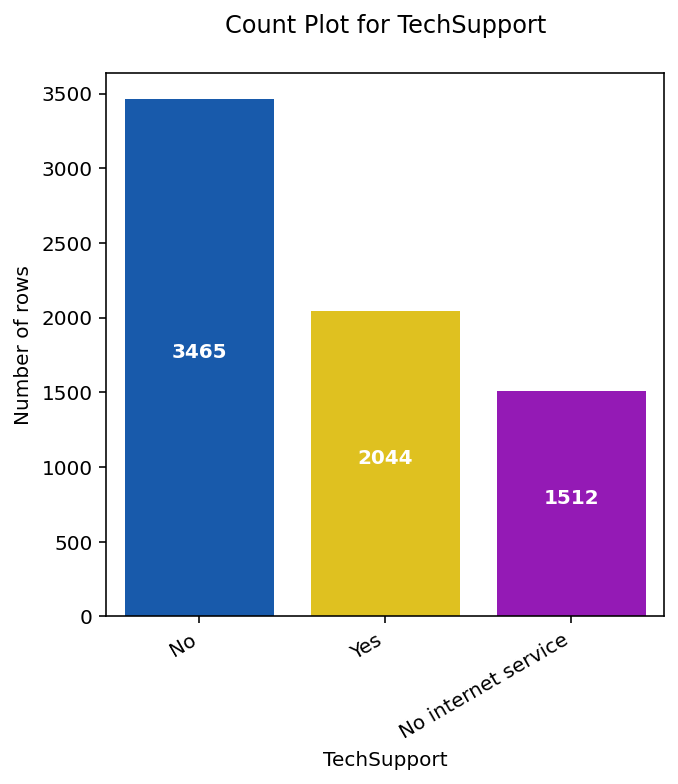

In [33]:
plt.style.use('seaborn-pastel')

try:
    plt.figure(figsize=(5,5))
    col_name = 'TechSupport'
    values = df1[col_name].value_counts()
    index = 0
    ax = sns.countplot(df1[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation = 30, ha='right')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass


# the below data shows cosumers with Tech Support

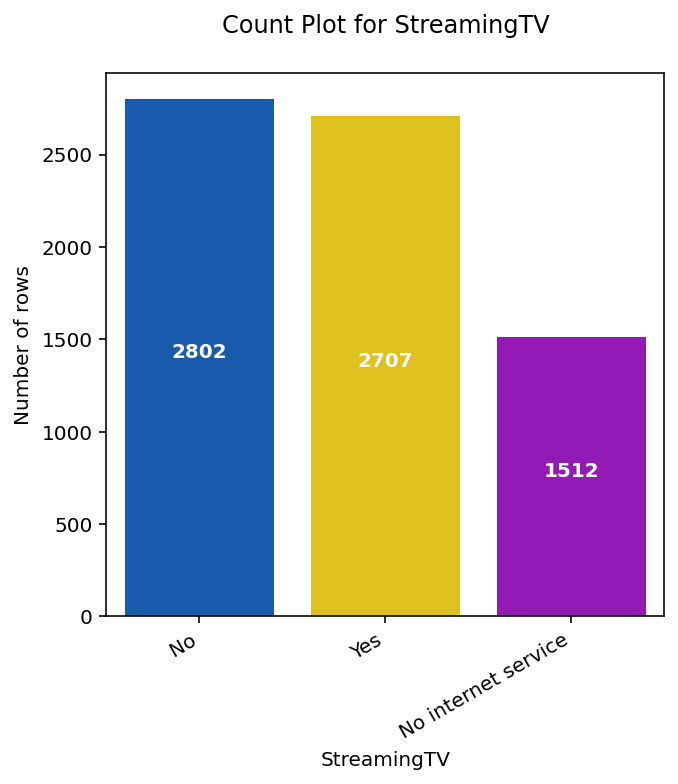

In [35]:
plt.style.use('seaborn-pastel')

try:
    plt.figure(figsize=(5,5))
    col_name = 'StreamingTV'
    values = df1[col_name].value_counts()
    index = 0
    ax = sns.countplot(df1[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation = 30, ha='right')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass


# the below data shows cosumers with Streaming TV Service

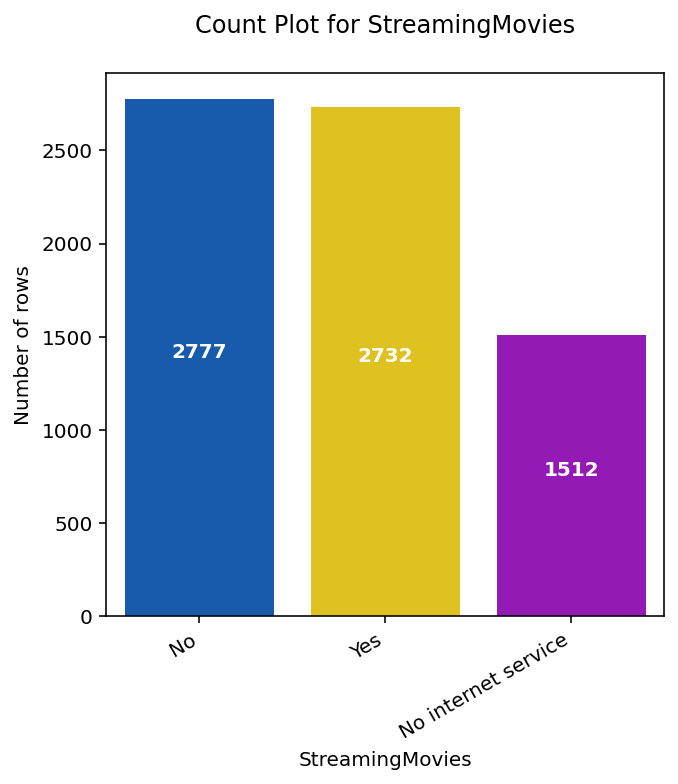

In [37]:
plt.style.use('seaborn-pastel')

try:
    plt.figure(figsize=(5,5))
    col_name = 'StreamingMovies'
    values = df1[col_name].value_counts()
    index = 0
    ax = sns.countplot(df1[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation = 30, ha='right')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass


# the below data shows cosumers with Streaming Movies

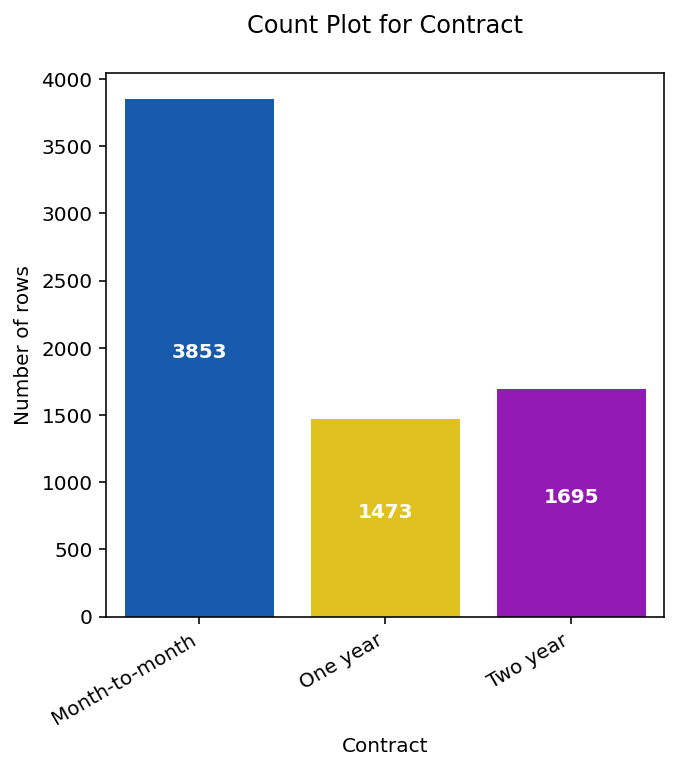

In [38]:
plt.style.use('seaborn-pastel')

try:
    plt.figure(figsize=(5,5))
    col_name = 'Contract'
    values = df1[col_name].value_counts()
    index = 0
    ax = sns.countplot(df1[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation = 30, ha='right')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass


# the below data shows cosumers with Shows the average contract periods.

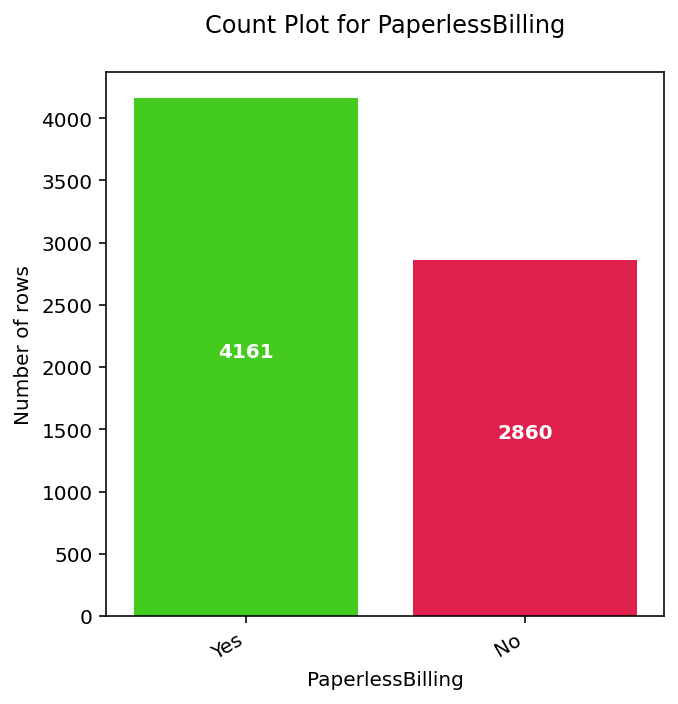

In [39]:
plt.style.use('seaborn-pastel')

try:
    plt.figure(figsize=(5,5))
    col_name = 'PaperlessBilling'
    values = df1[col_name].value_counts()
    index = 0
    ax = sns.countplot(df1[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation = 30, ha='right')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass


# the below data shows cosumers opted for paperless billing

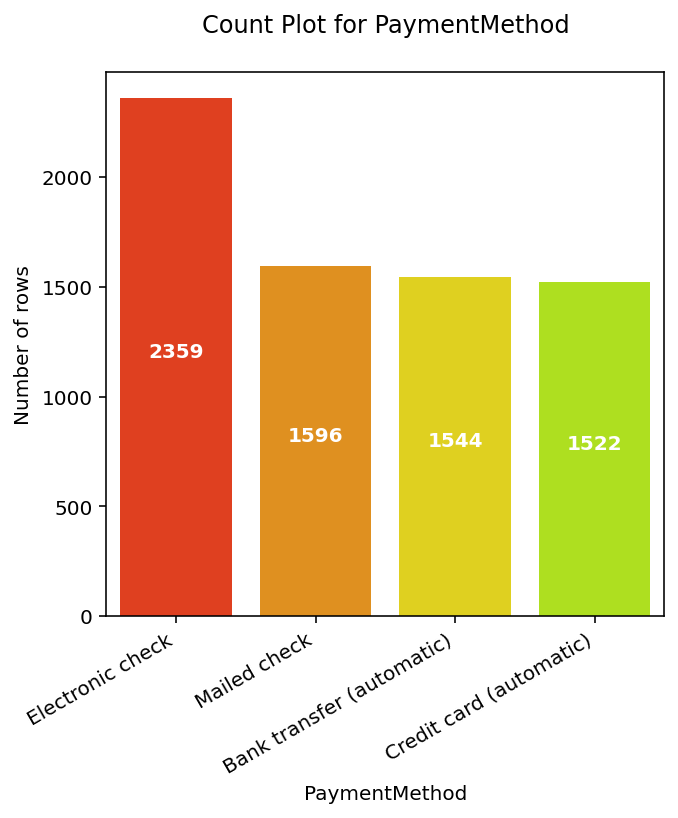

In [40]:
plt.style.use('seaborn-pastel')

try:
    plt.figure(figsize=(5,5))
    col_name = 'PaymentMethod'
    values = df1[col_name].value_counts()
    index = 0
    ax = sns.countplot(df1[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation = 30, ha='right')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass


# the below data shows cosumers payment method behaviour.

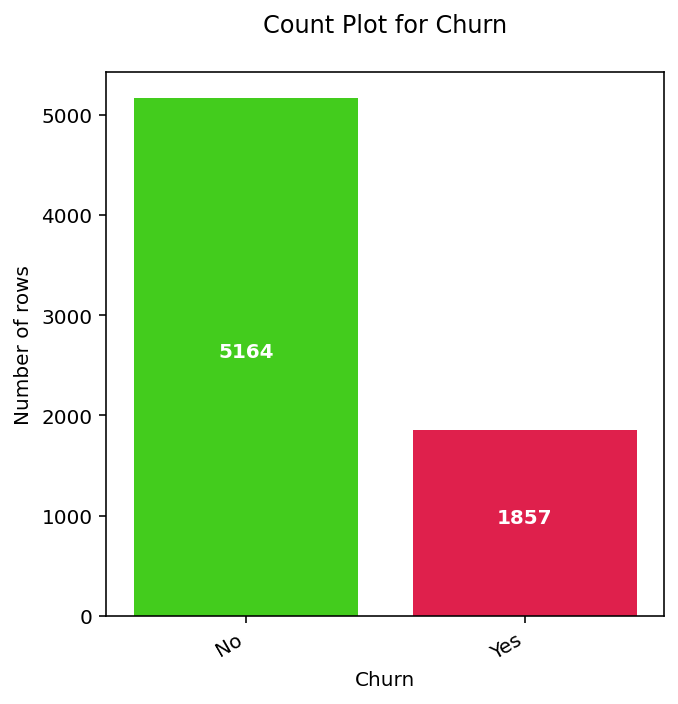

In [46]:
plt.style.use('seaborn-pastel')

try:
    plt.figure(figsize=(5,5))
    col_name = 'Churn'
    values = df1[col_name].value_counts()
    index = 0
    ax = sns.countplot(df1[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation = 30, ha='right')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass


# the below data shows cosumers possibilities of Churn.

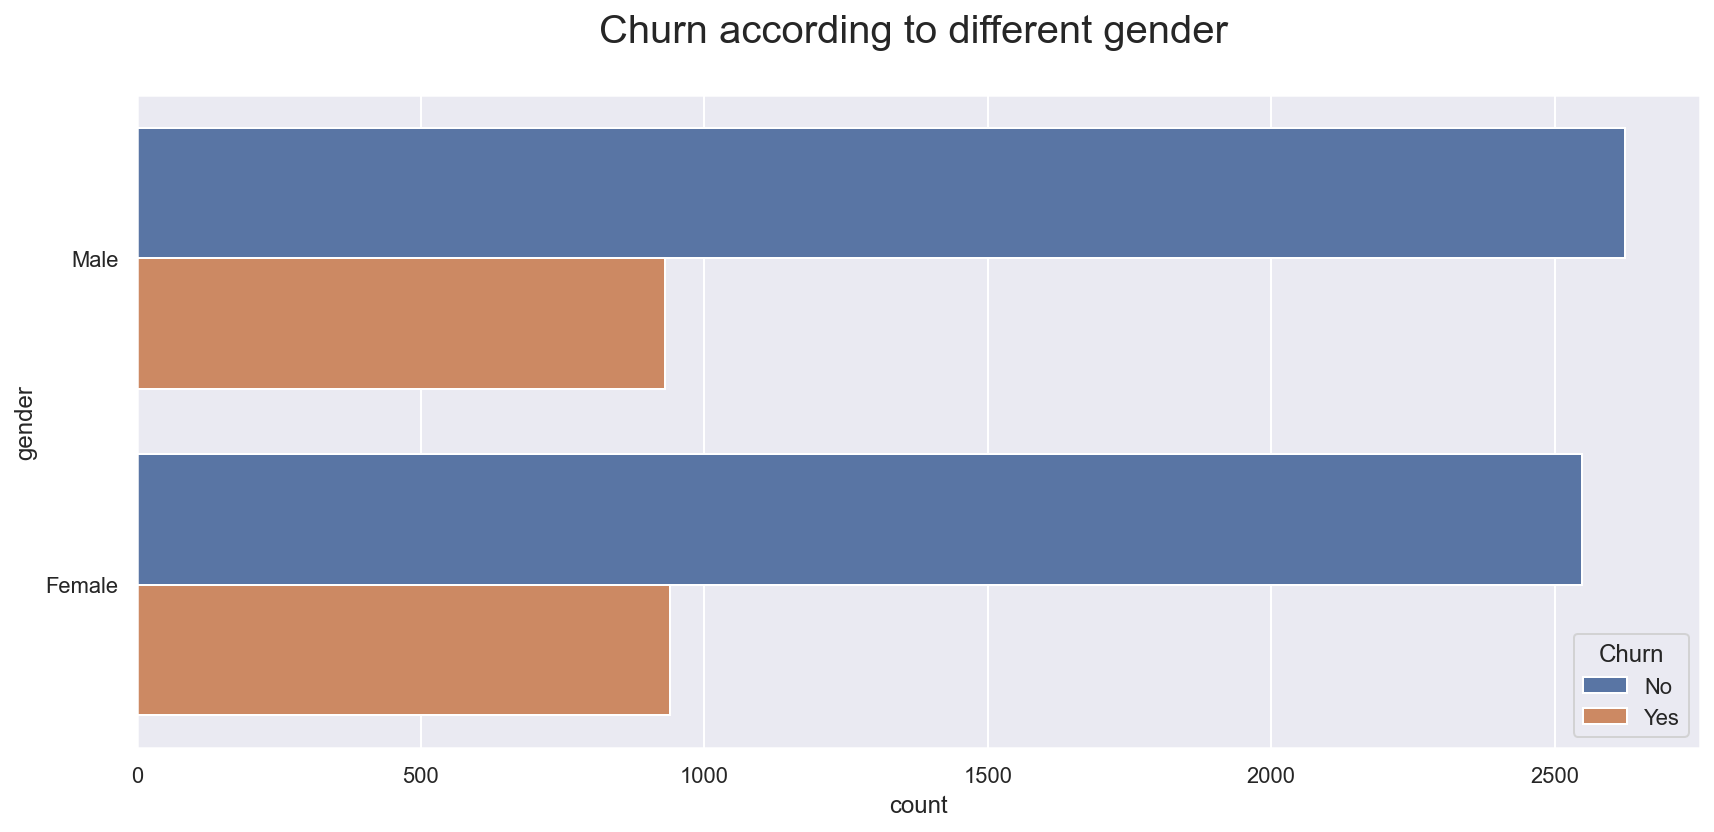

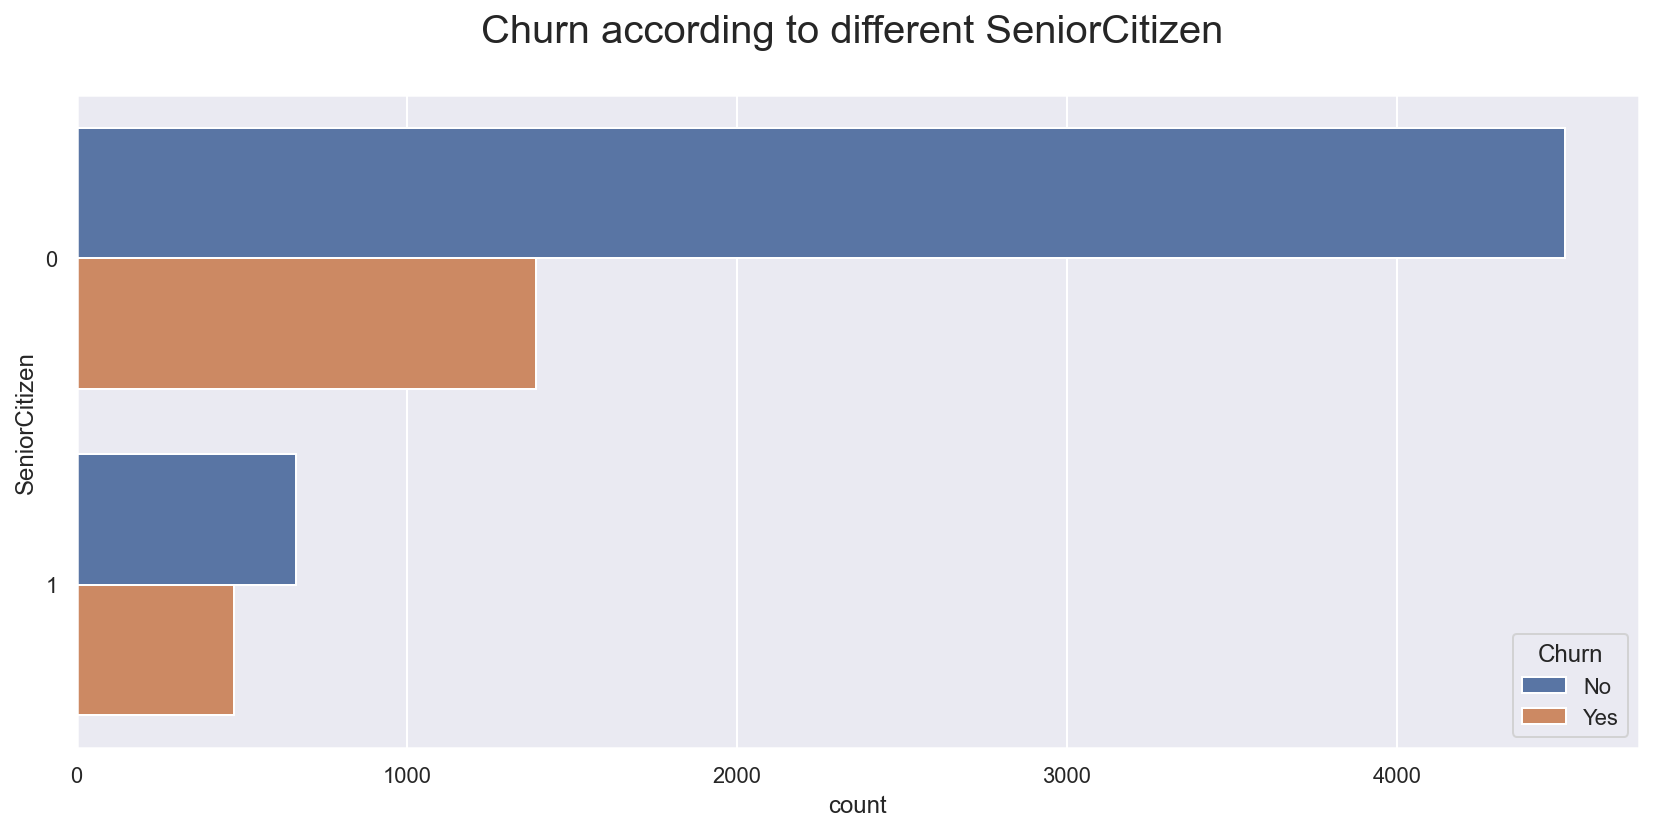

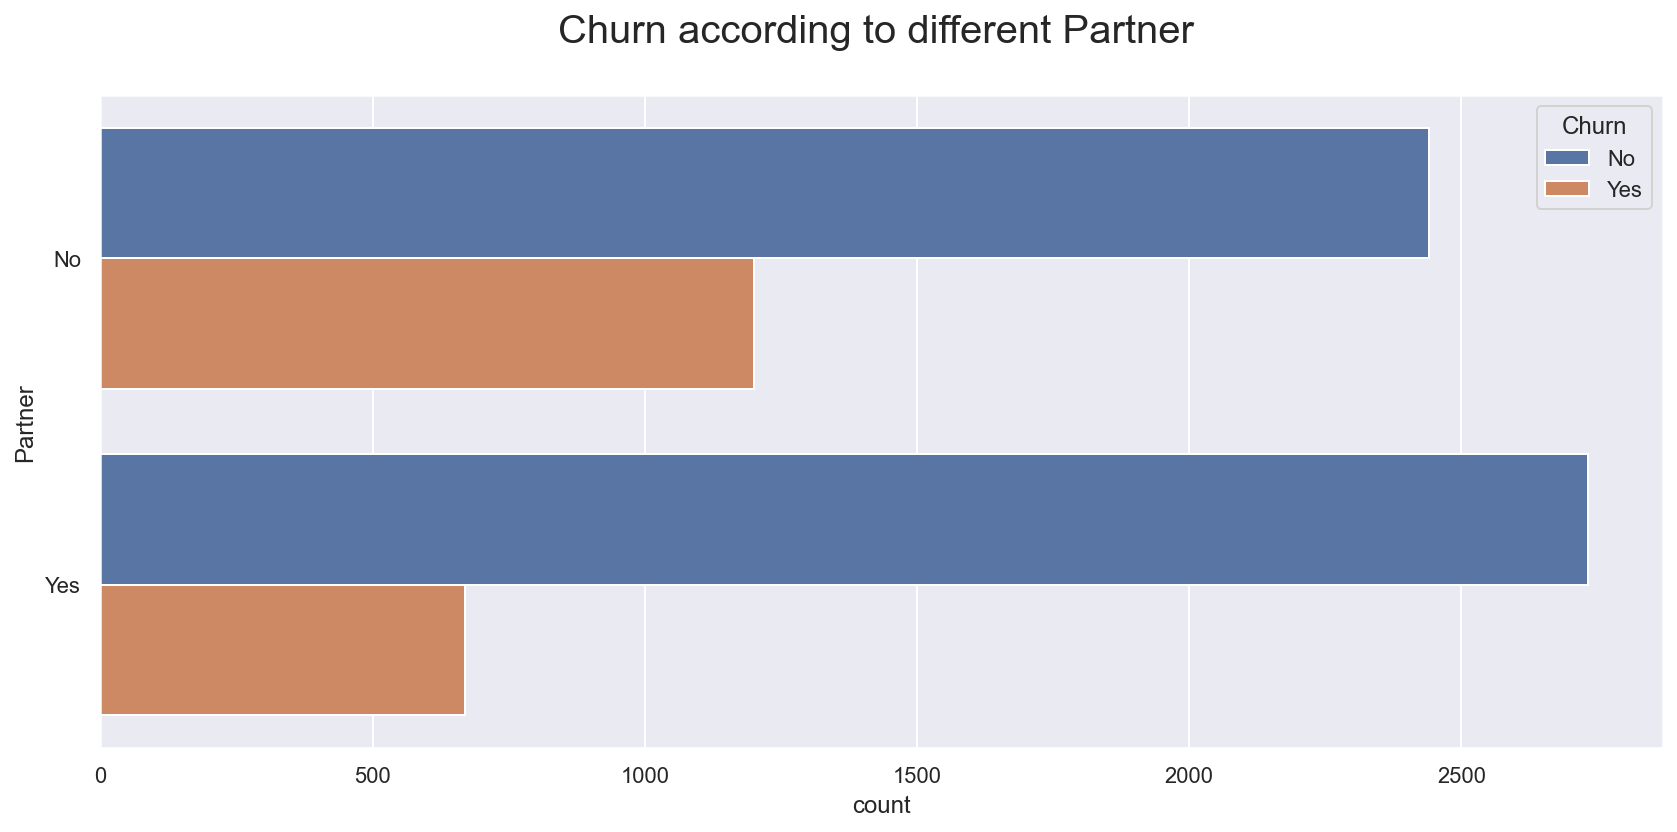

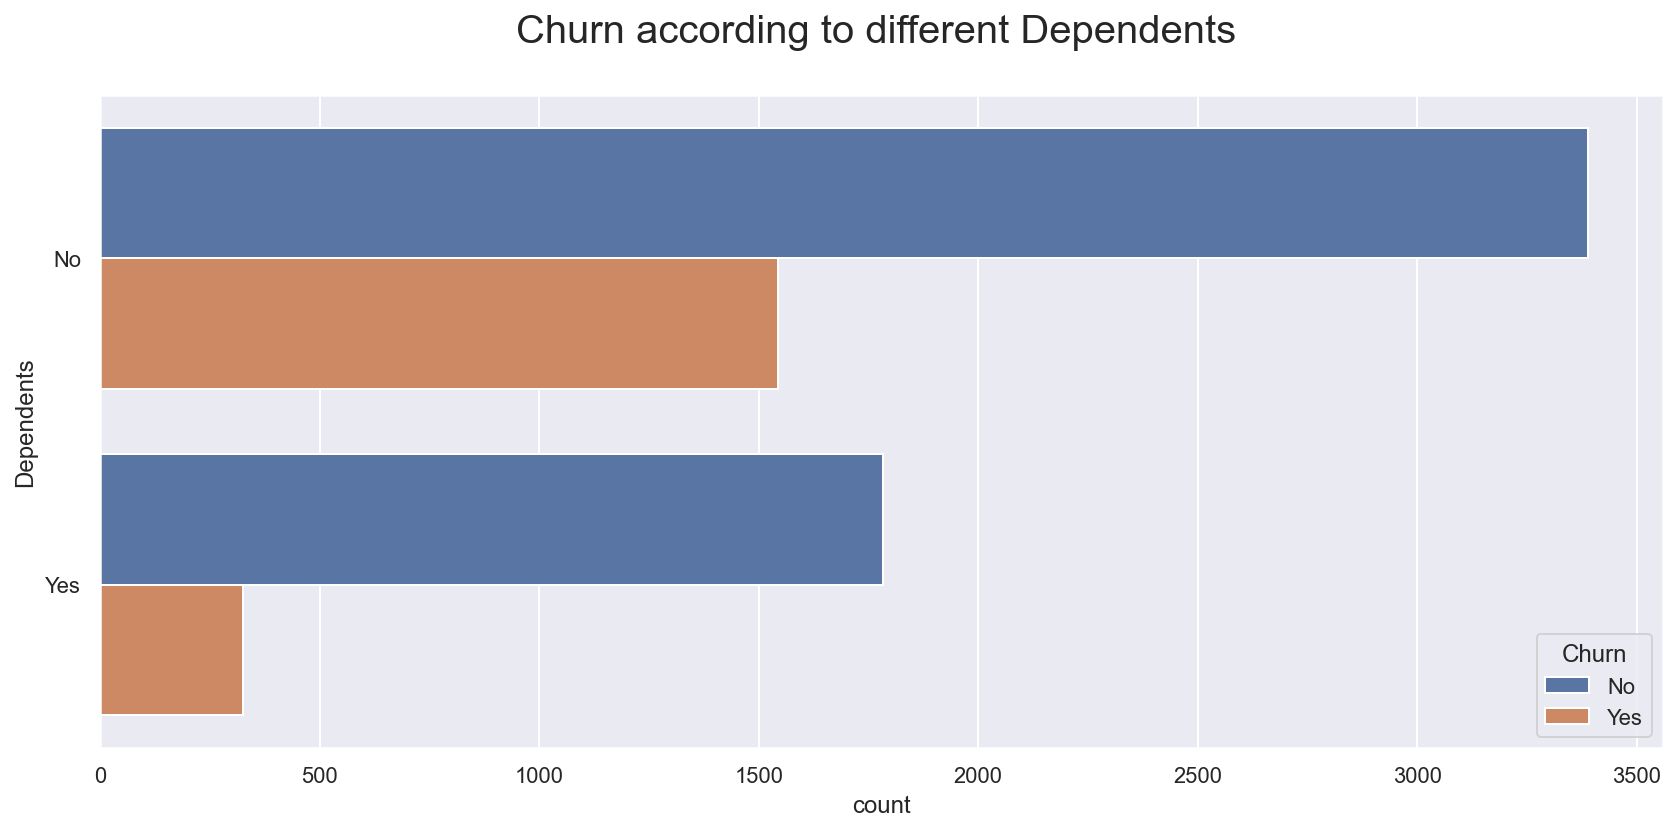

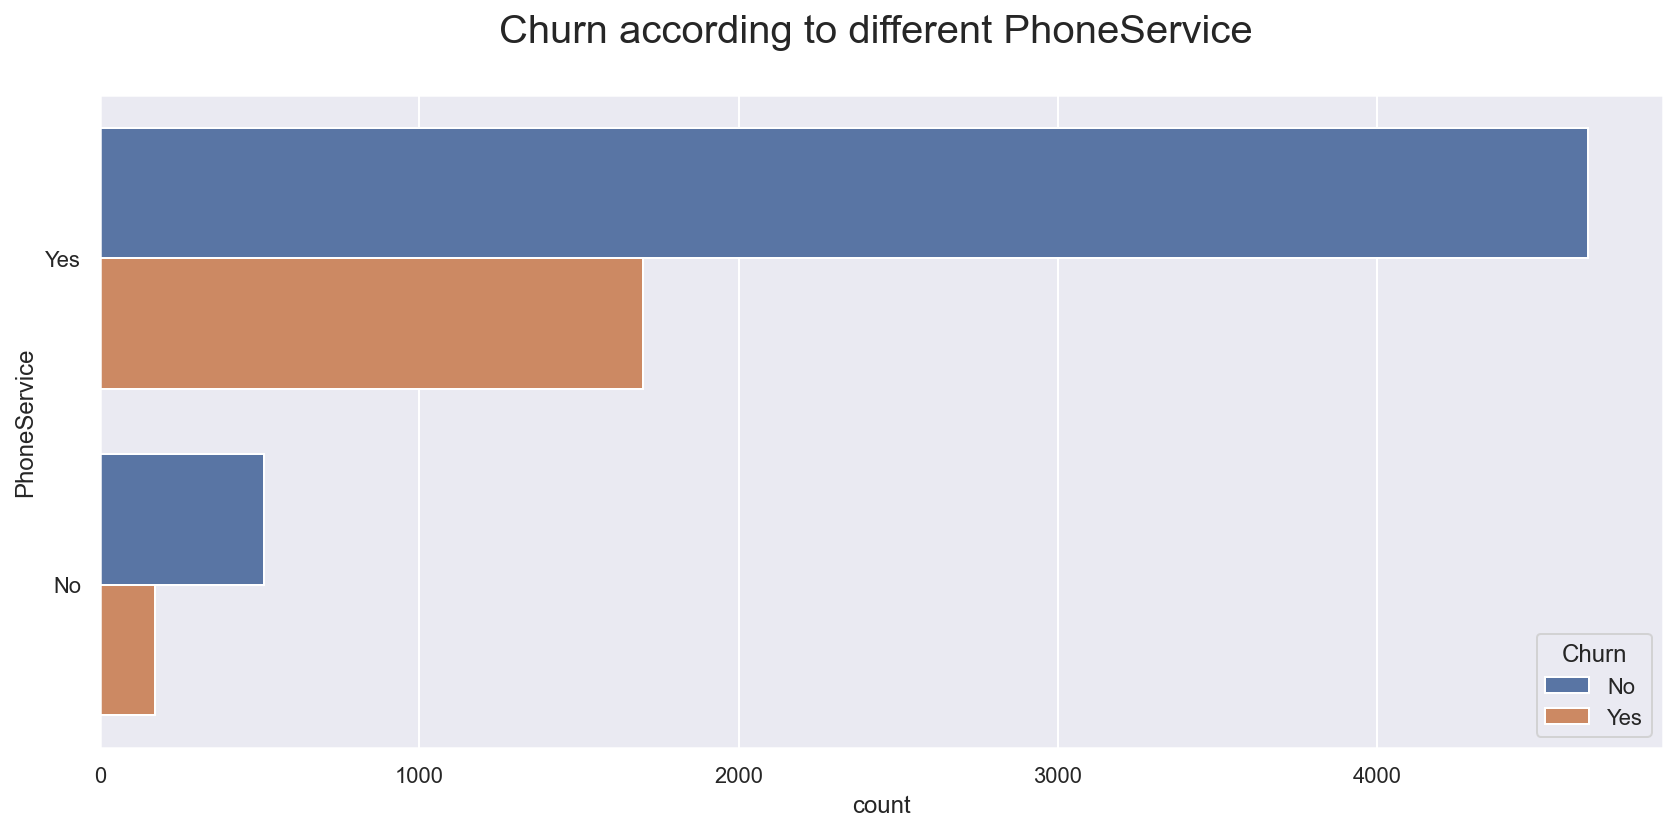

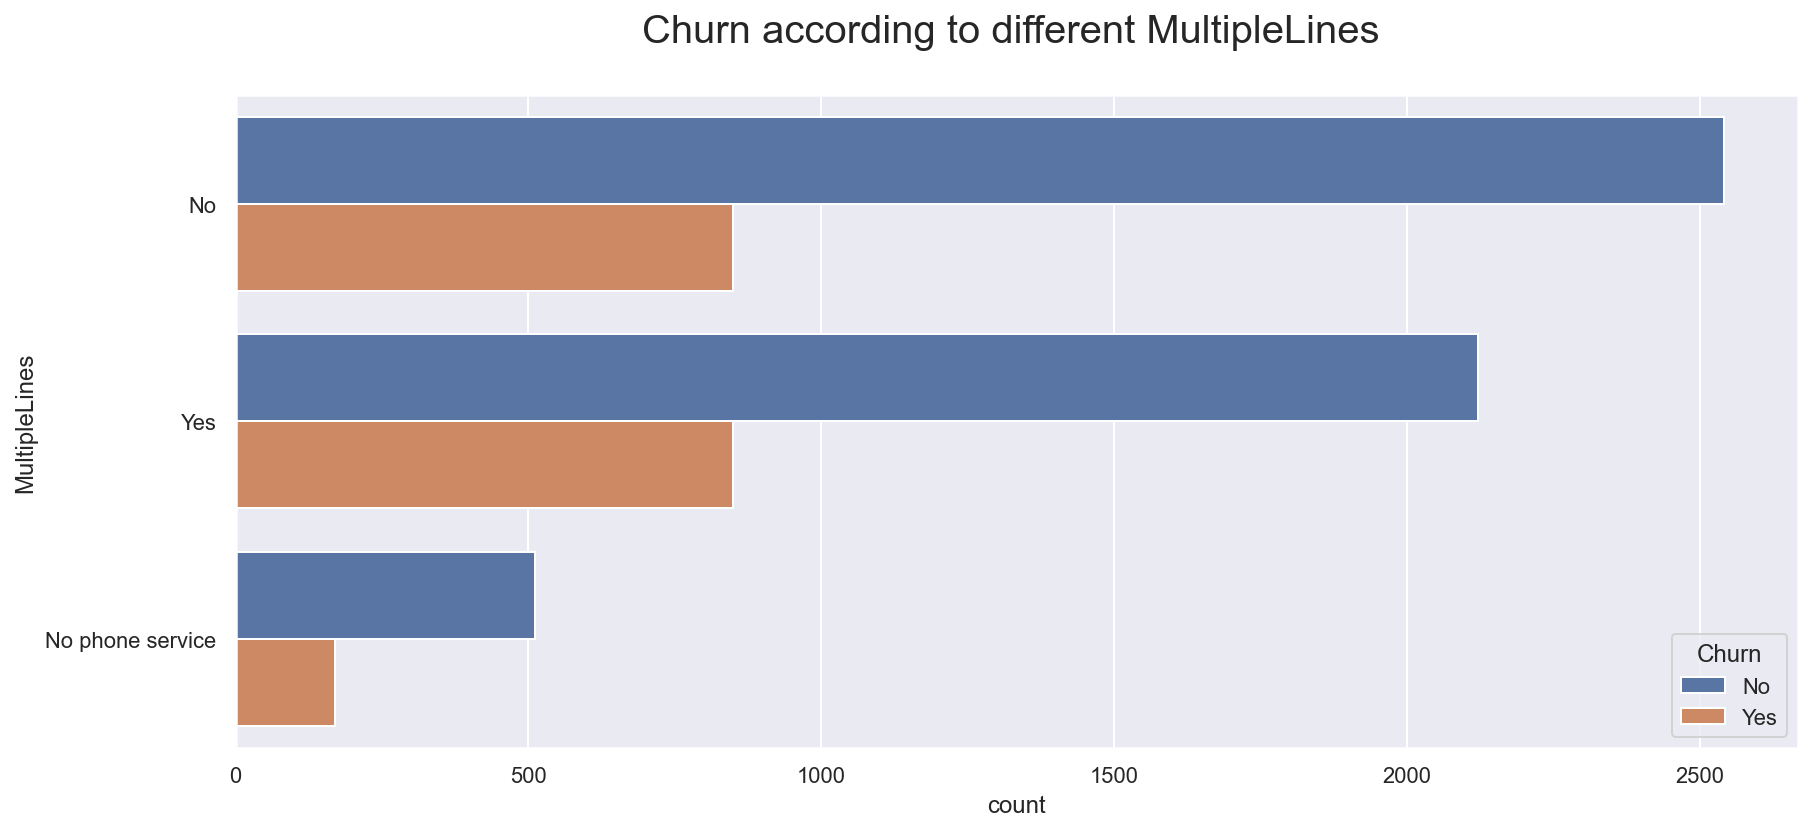

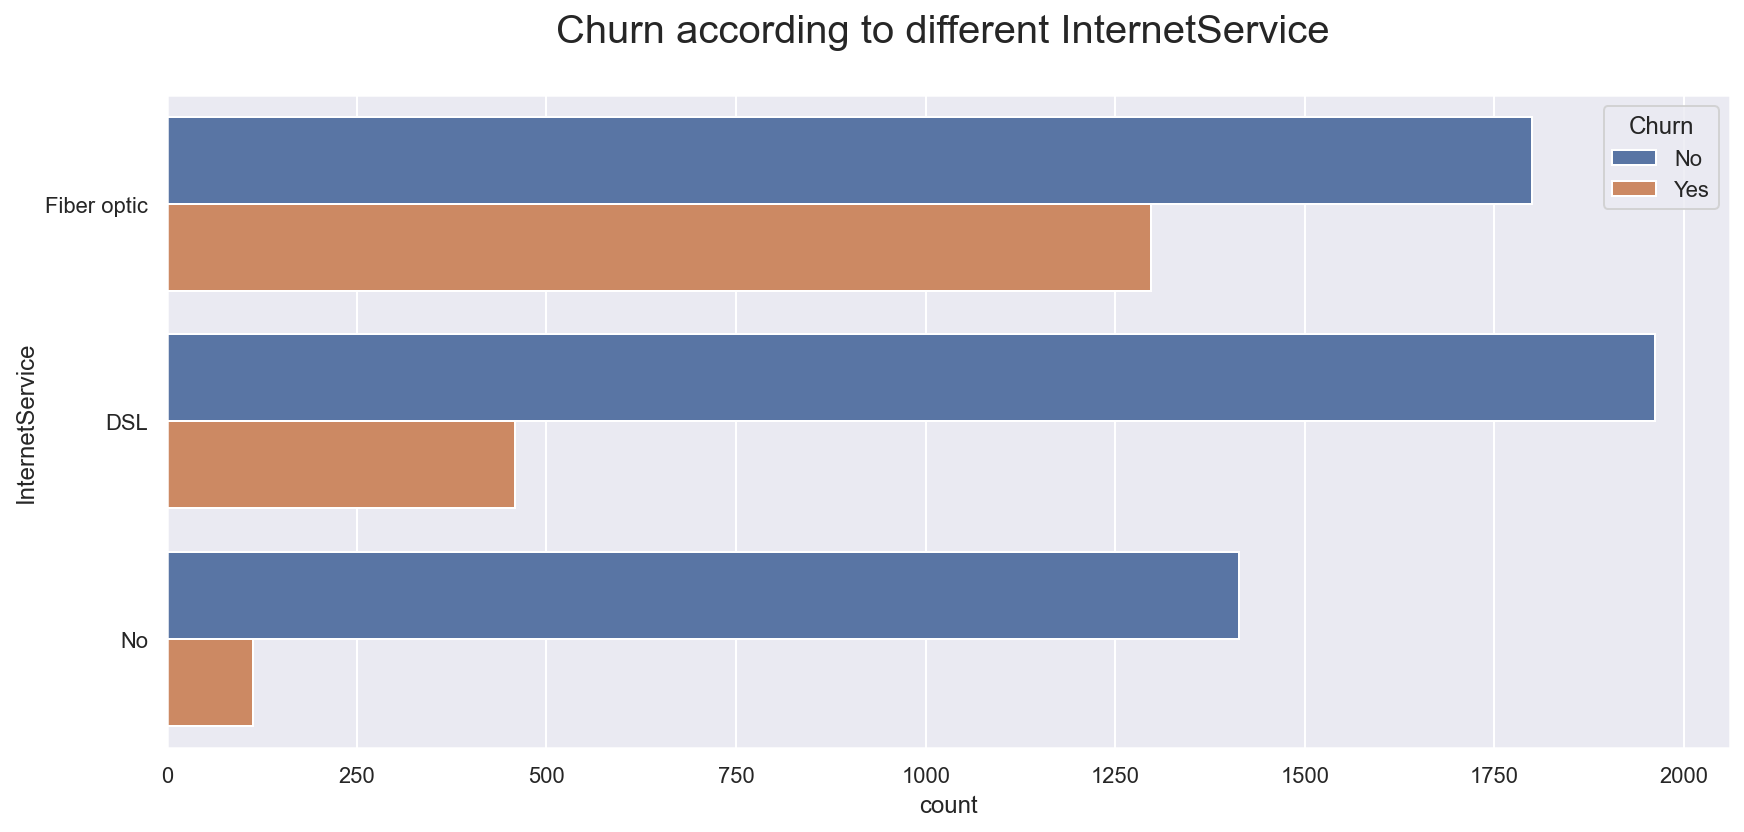

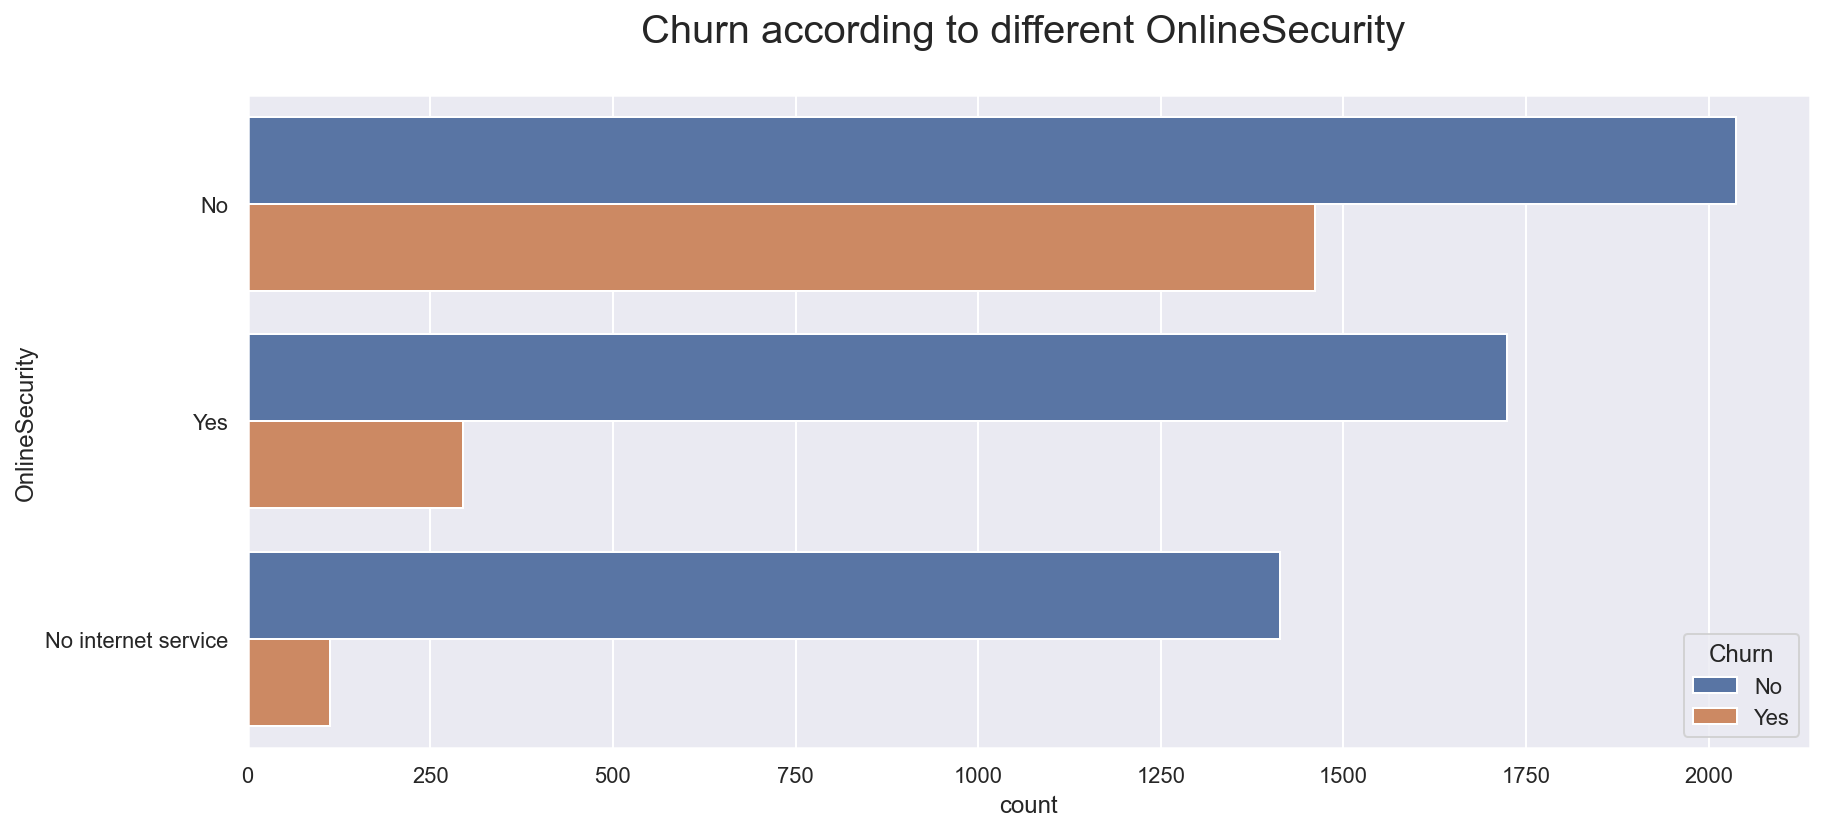

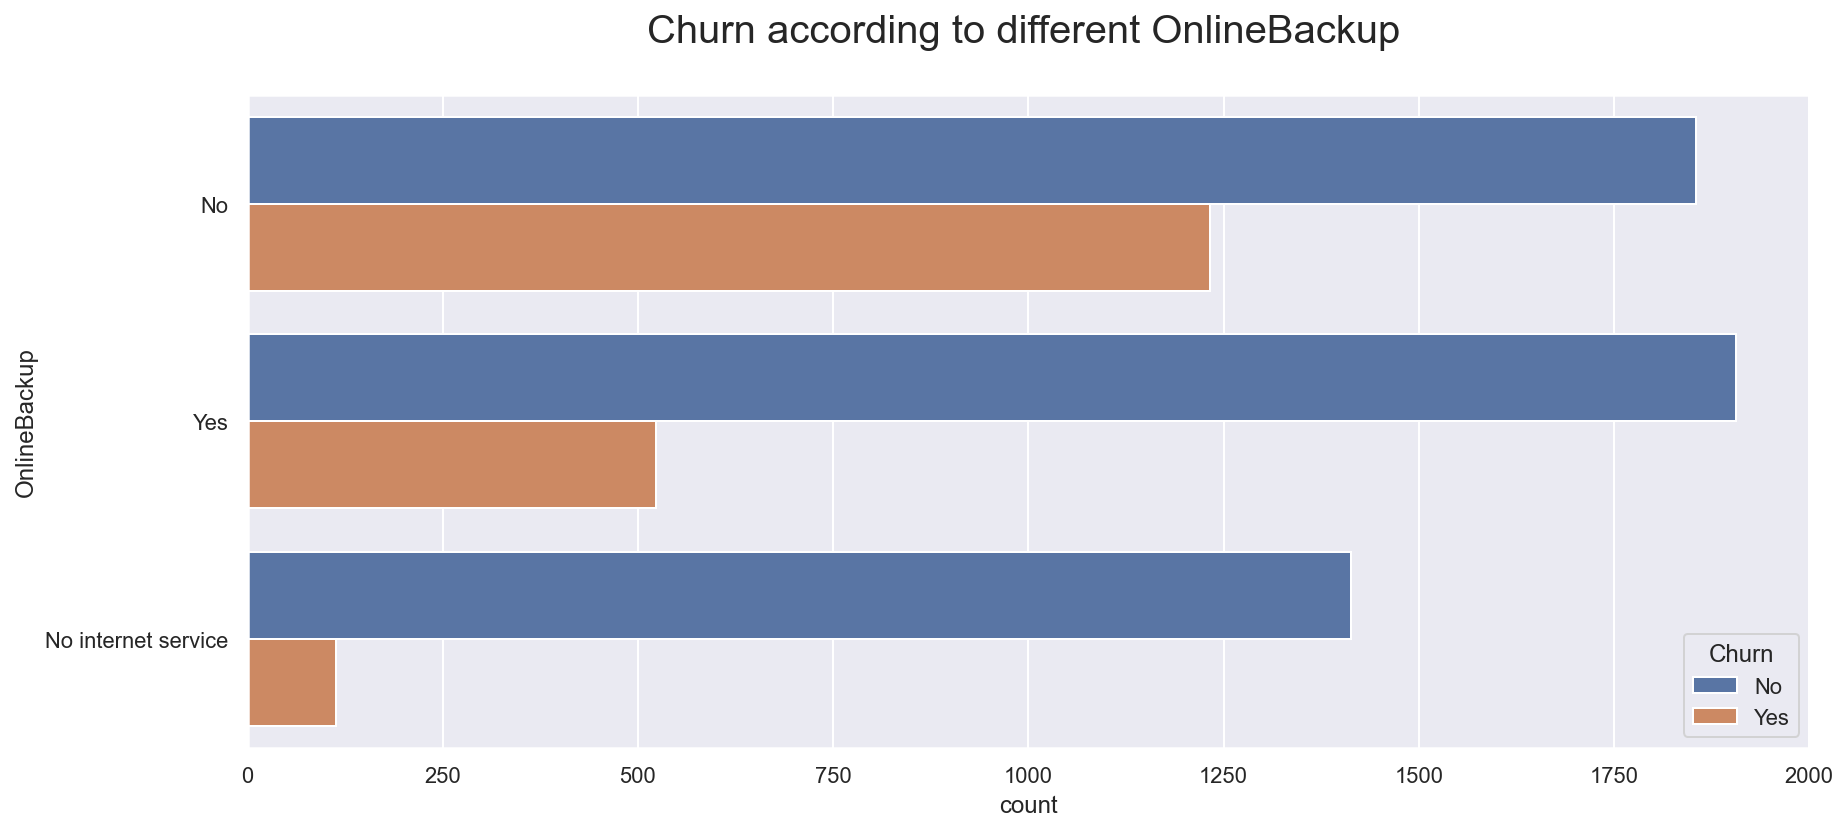

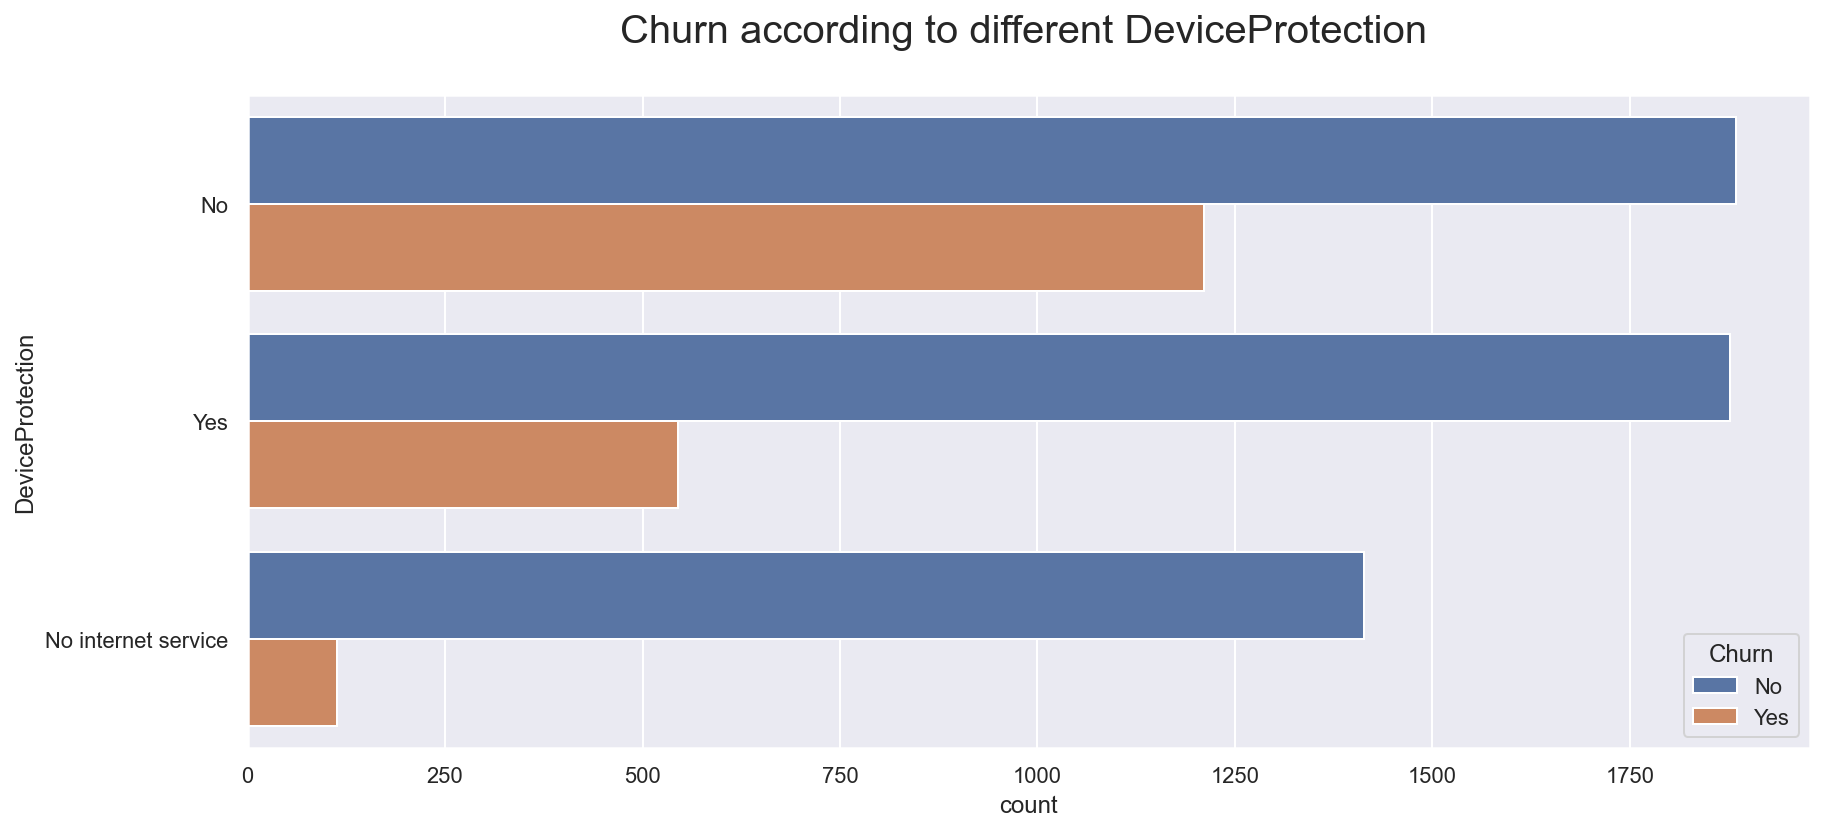

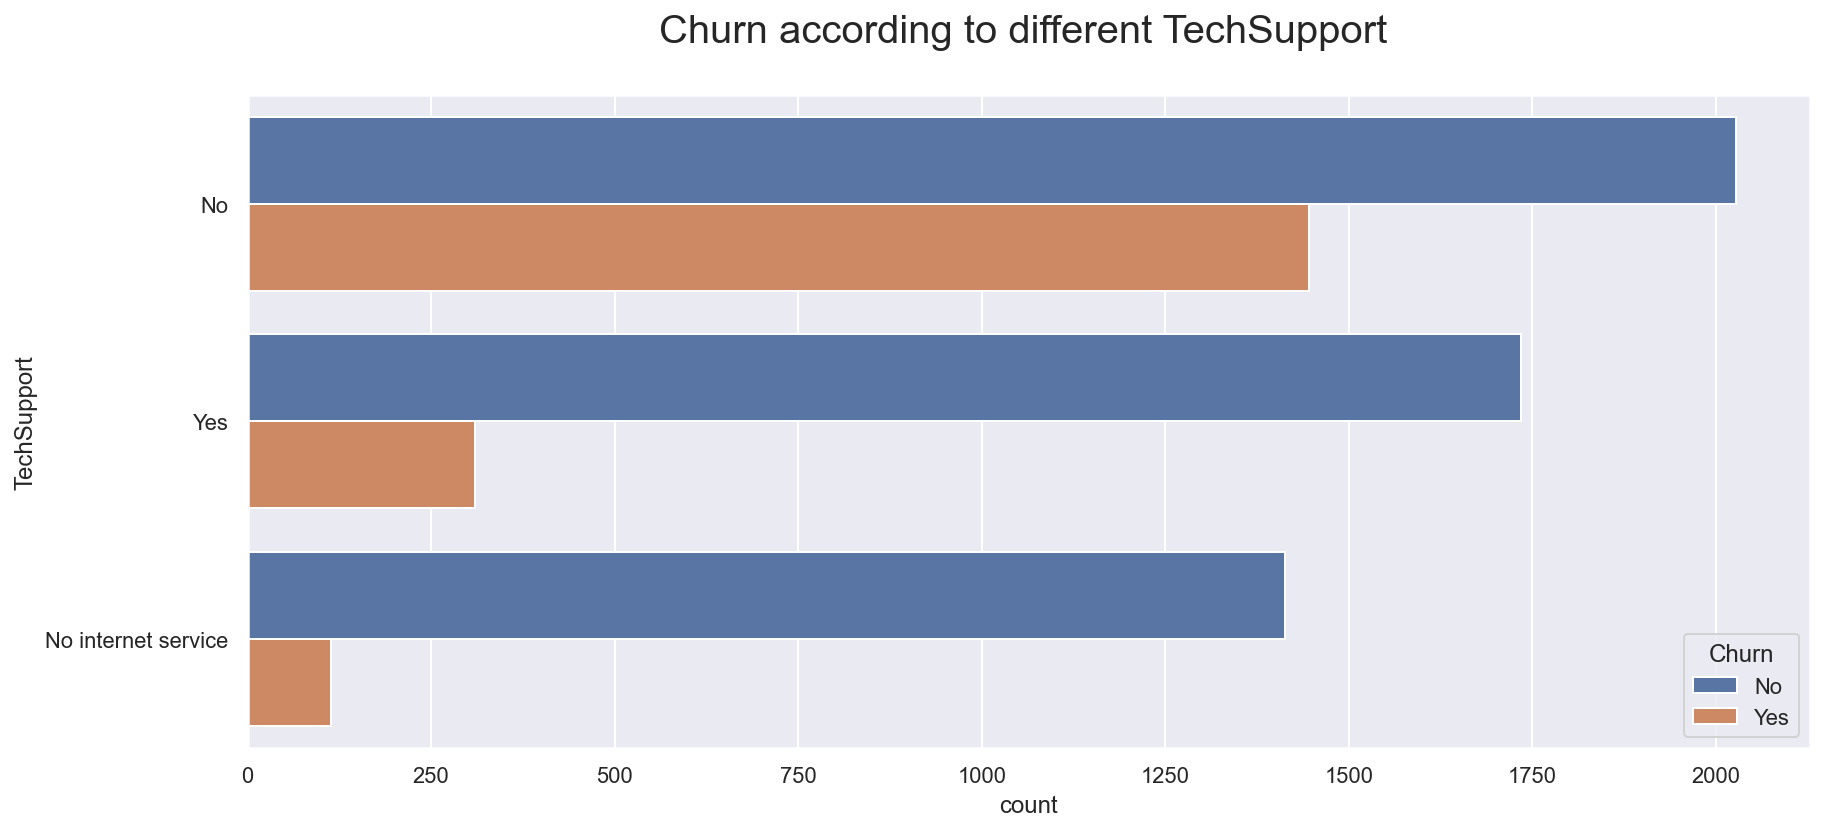

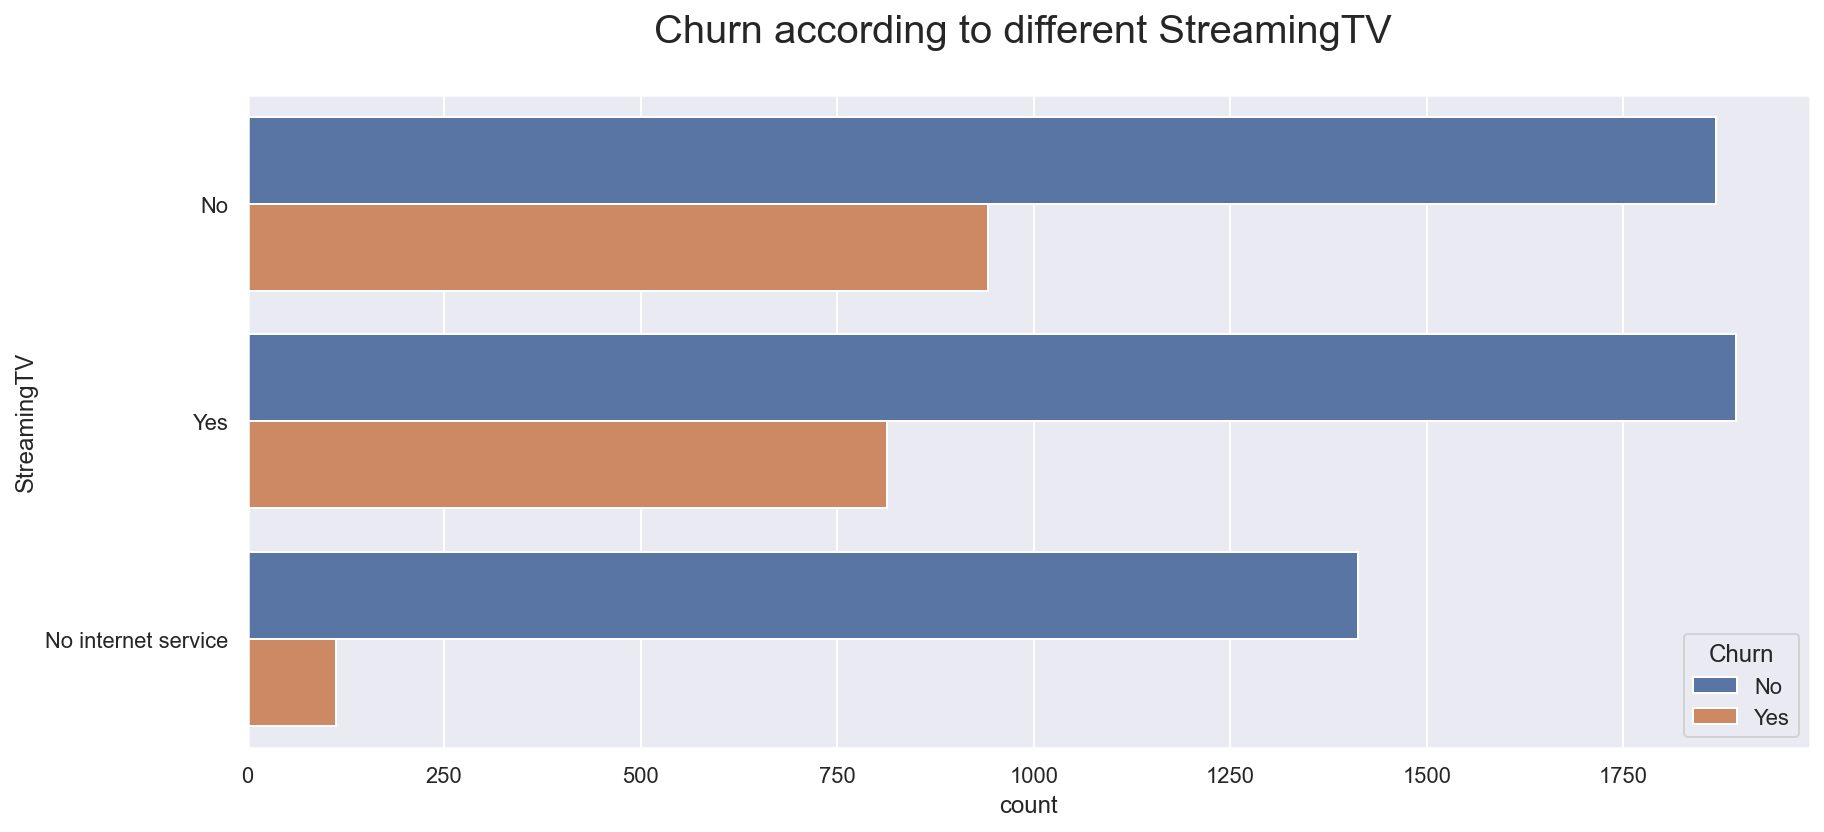

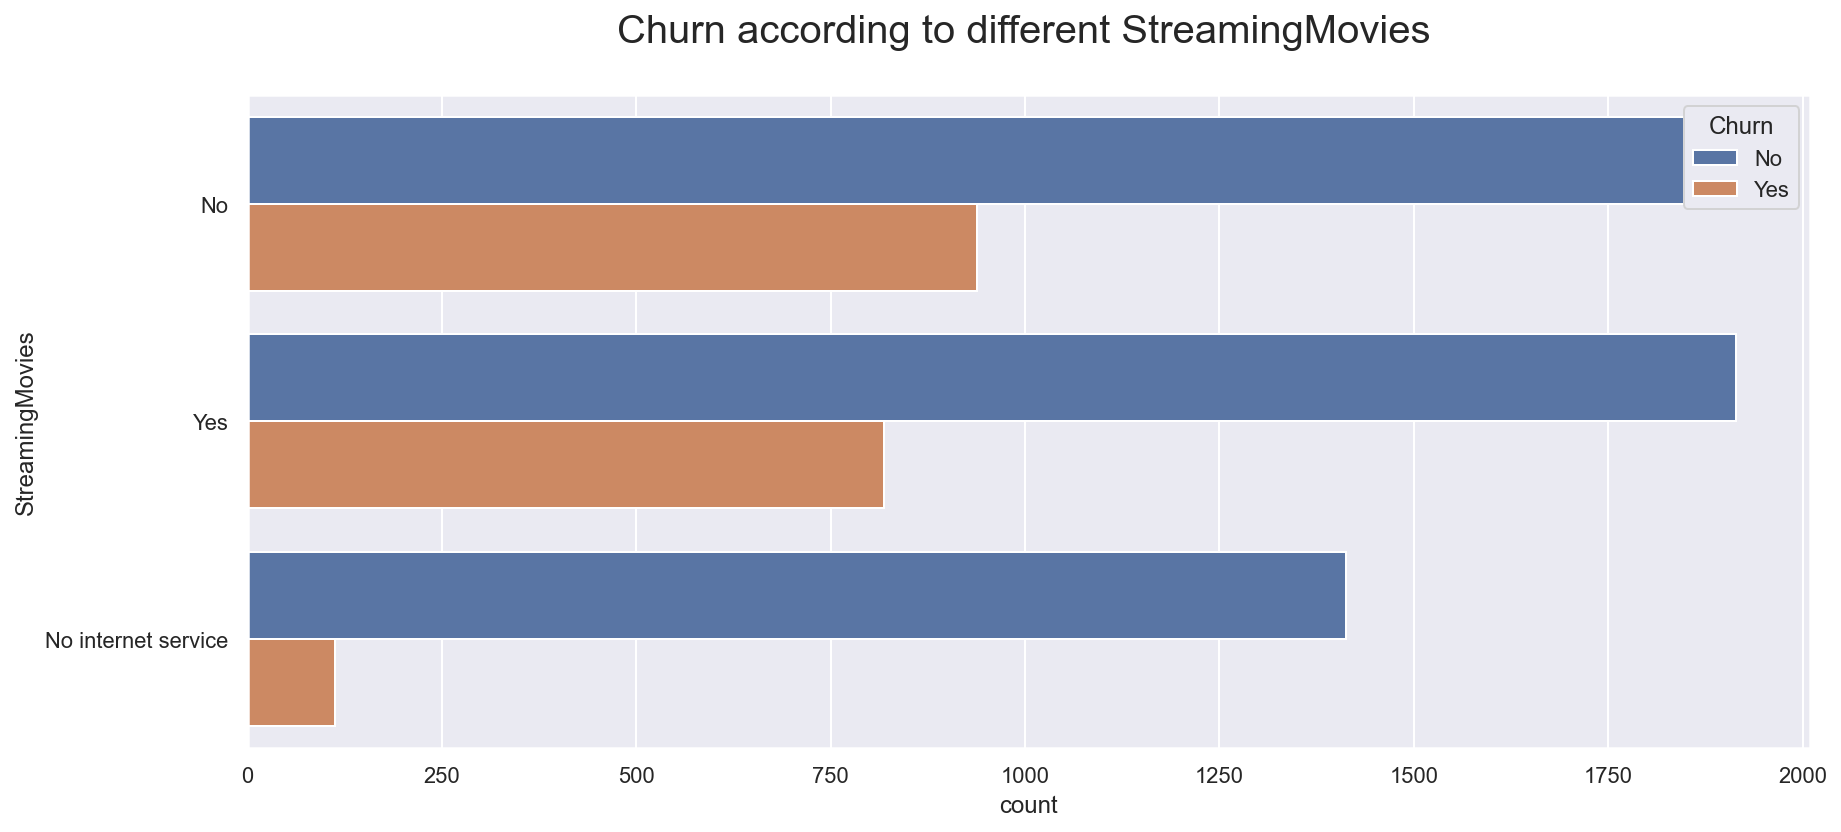

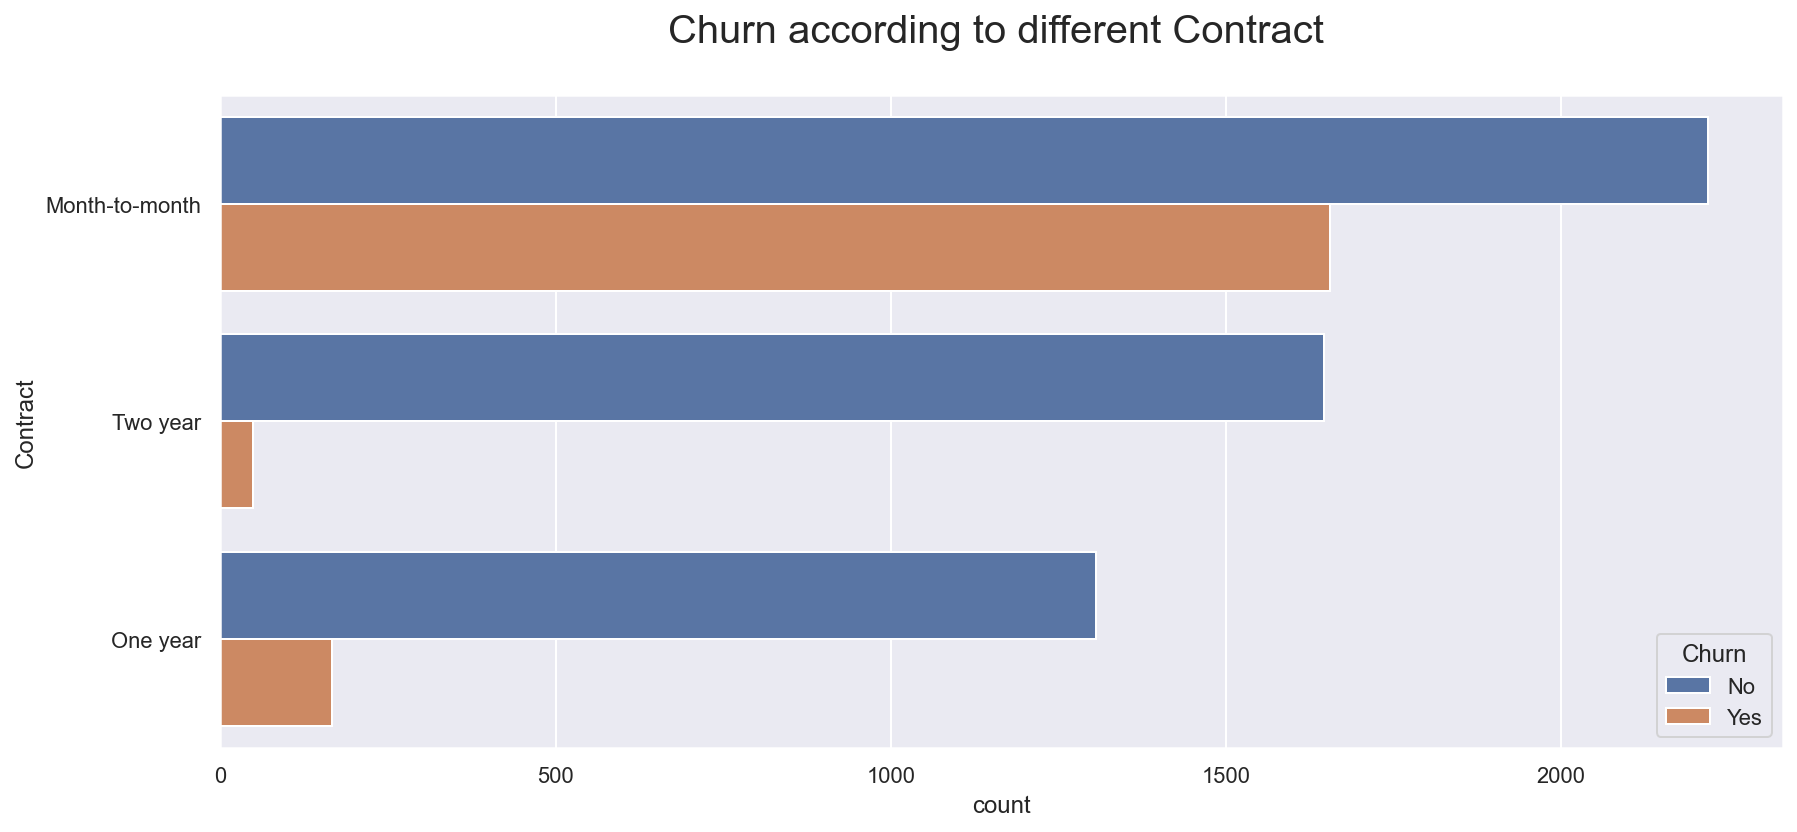

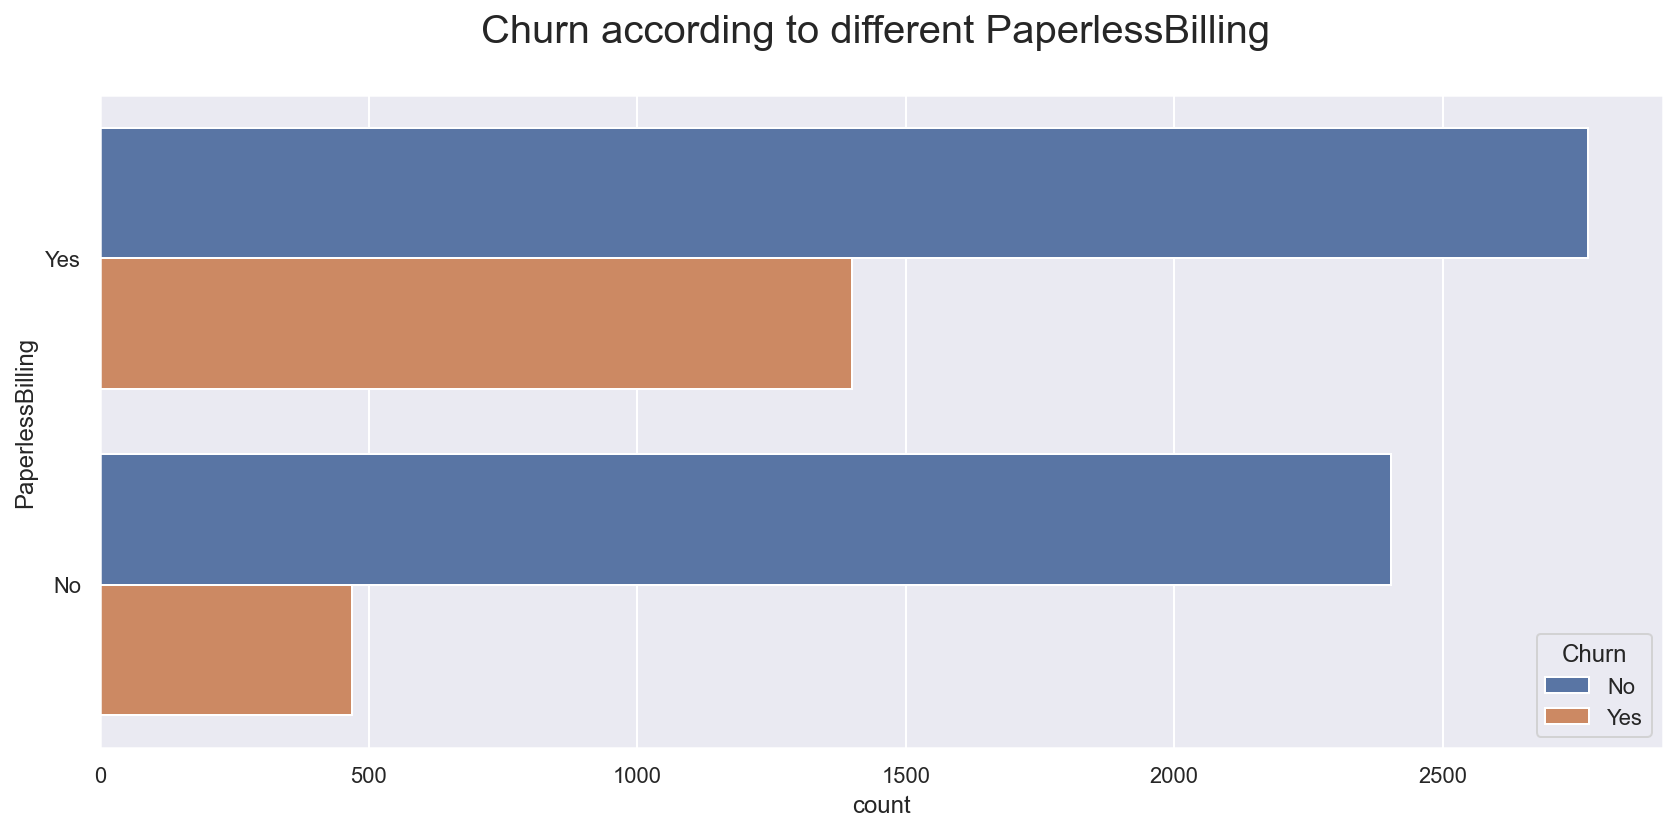

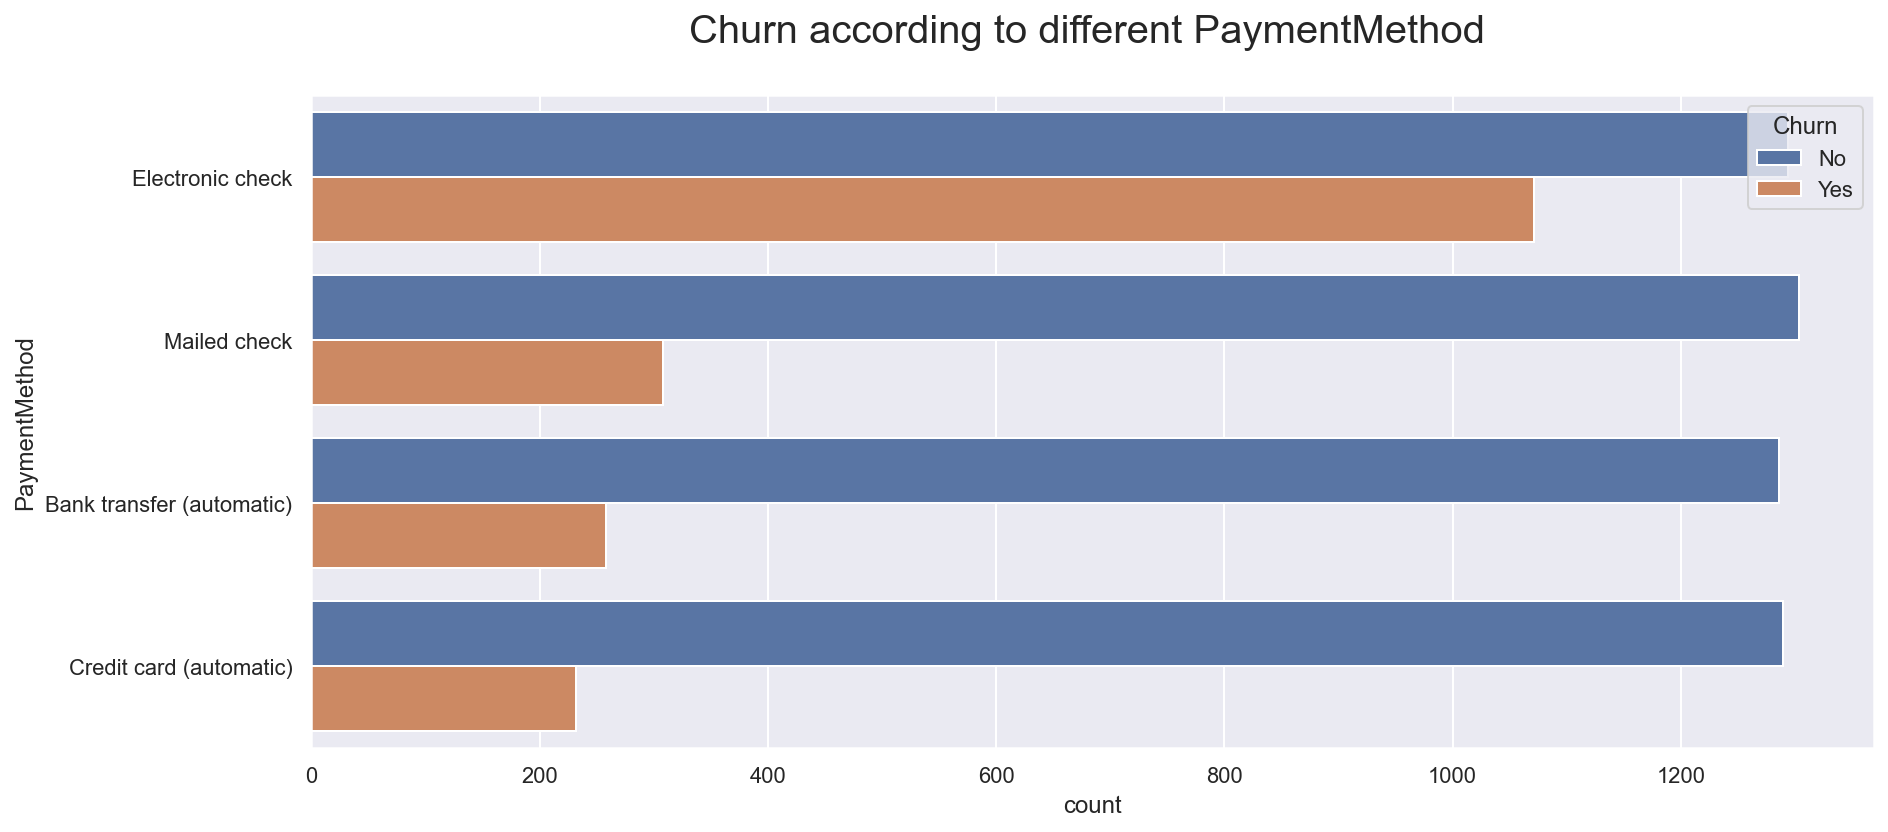

In [102]:
hue = 'Churn'

y = 'gender'
plt.figure(figsize=(14,6))
sns.set(style='darkgrid')
sns.countplot(hue = hue , y = y,
              data = df,
              order = df['gender'].value_counts().index)
plt.title(f"Churn according to different {y} \n", fontsize = 20)
plt.show()


y = 'SeniorCitizen'
plt.figure(figsize=(14,6))
sns.set(style='darkgrid')
sns.countplot(hue = hue , y = y,
              data = df,
              order = df['SeniorCitizen'].value_counts().index)
plt.title(f"Churn according to different {y} \n", fontsize = 20)
plt.show()


y = 'Partner'
plt.figure(figsize=(14,6))
sns.set(style='darkgrid')
sns.countplot(hue = hue , y = y,
              data = df,
              order = df['Partner'].value_counts().index)
plt.title(f"Churn according to different {y} \n", fontsize = 20)
plt.show()


y = 'Dependents'
plt.figure(figsize=(14,6))
sns.set(style='darkgrid')
sns.countplot(hue = hue , y = y,
              data = df,
              order = df['Dependents'].value_counts().index)
plt.title(f"Churn according to different {y} \n", fontsize = 20)
plt.show()

y = 'PhoneService'
plt.figure(figsize=(14,6))
sns.set(style='darkgrid')
sns.countplot(hue = hue , y = y,
              data = df,
              order = df['PhoneService'].value_counts().index)
plt.title(f"Churn according to different {y} \n", fontsize = 20)
plt.show()

y = 'MultipleLines'
plt.figure(figsize=(14,6))
sns.set(style='darkgrid')
sns.countplot(hue = hue , y = y,
              data = df,
              order = df['MultipleLines'].value_counts().index)
plt.title(f"Churn according to different {y} \n", fontsize = 20)
plt.show()

y = 'InternetService'
plt.figure(figsize=(14,6))
sns.set(style='darkgrid')
sns.countplot(hue = hue , y = y,
              data = df,
              order = df['InternetService'].value_counts().index)
plt.title(f"Churn according to different {y} \n", fontsize = 20)
plt.show()

y = 'OnlineSecurity'
plt.figure(figsize=(14,6))
sns.set(style='darkgrid')
sns.countplot(hue = hue , y = y,
              data = df,
              order = df['OnlineSecurity'].value_counts().index)
plt.title(f"Churn according to different {y} \n", fontsize = 20)
plt.show()

y = 'OnlineBackup'
plt.figure(figsize=(14,6))
sns.set(style='darkgrid')
sns.countplot(hue = hue , y = y,
              data = df,
              order = df['OnlineBackup'].value_counts().index)
plt.title(f"Churn according to different {y} \n", fontsize = 20)
plt.show()

y = 'DeviceProtection'
plt.figure(figsize=(14,6))
sns.set(style='darkgrid')
sns.countplot(hue = hue , y = y,
              data = df,
              order = df['DeviceProtection'].value_counts().index)
plt.title(f"Churn according to different {y} \n", fontsize = 20)
plt.show()

y = 'TechSupport'
plt.figure(figsize=(14,6))
sns.set(style='darkgrid')
sns.countplot(hue = hue , y = y,
              data = df,
              order = df['TechSupport'].value_counts().index)
plt.title(f"Churn according to different {y} \n", fontsize = 20)
plt.show()

y = 'StreamingTV'
plt.figure(figsize=(14,6))
sns.set(style='darkgrid')
sns.countplot(hue = hue , y = y,
              data = df,
              order = df['StreamingTV'].value_counts().index)
plt.title(f"Churn according to different {y} \n", fontsize = 20)
plt.show()

y = 'StreamingMovies'
plt.figure(figsize=(14,6))
sns.set(style='darkgrid')
sns.countplot(hue = hue , y = y,
              data = df,
              order = df['StreamingMovies'].value_counts().index)
plt.title(f"Churn according to different {y} \n", fontsize = 20)
plt.show()

y = 'Contract'
plt.figure(figsize=(14,6))
sns.set(style='darkgrid')
sns.countplot(hue = hue , y = y,
              data = df,
              order = df['Contract'].value_counts().index)
plt.title(f"Churn according to different {y} \n", fontsize = 20)
plt.show()

y = 'PaperlessBilling'
plt.figure(figsize=(14,6))
sns.set(style='darkgrid')
sns.countplot(hue = hue , y = y,
              data = df,
              order = df['PaperlessBilling'].value_counts().index)
plt.title(f"Churn according to different {y} \n", fontsize = 20)
plt.show()

y = 'PaymentMethod'
plt.figure(figsize=(14,6))
sns.set(style='darkgrid')
sns.countplot(hue = hue , y = y,
              data = df,
              order = df['PaymentMethod'].value_counts().index)
plt.title(f"Churn according to different {y} \n", fontsize = 20)
plt.show()

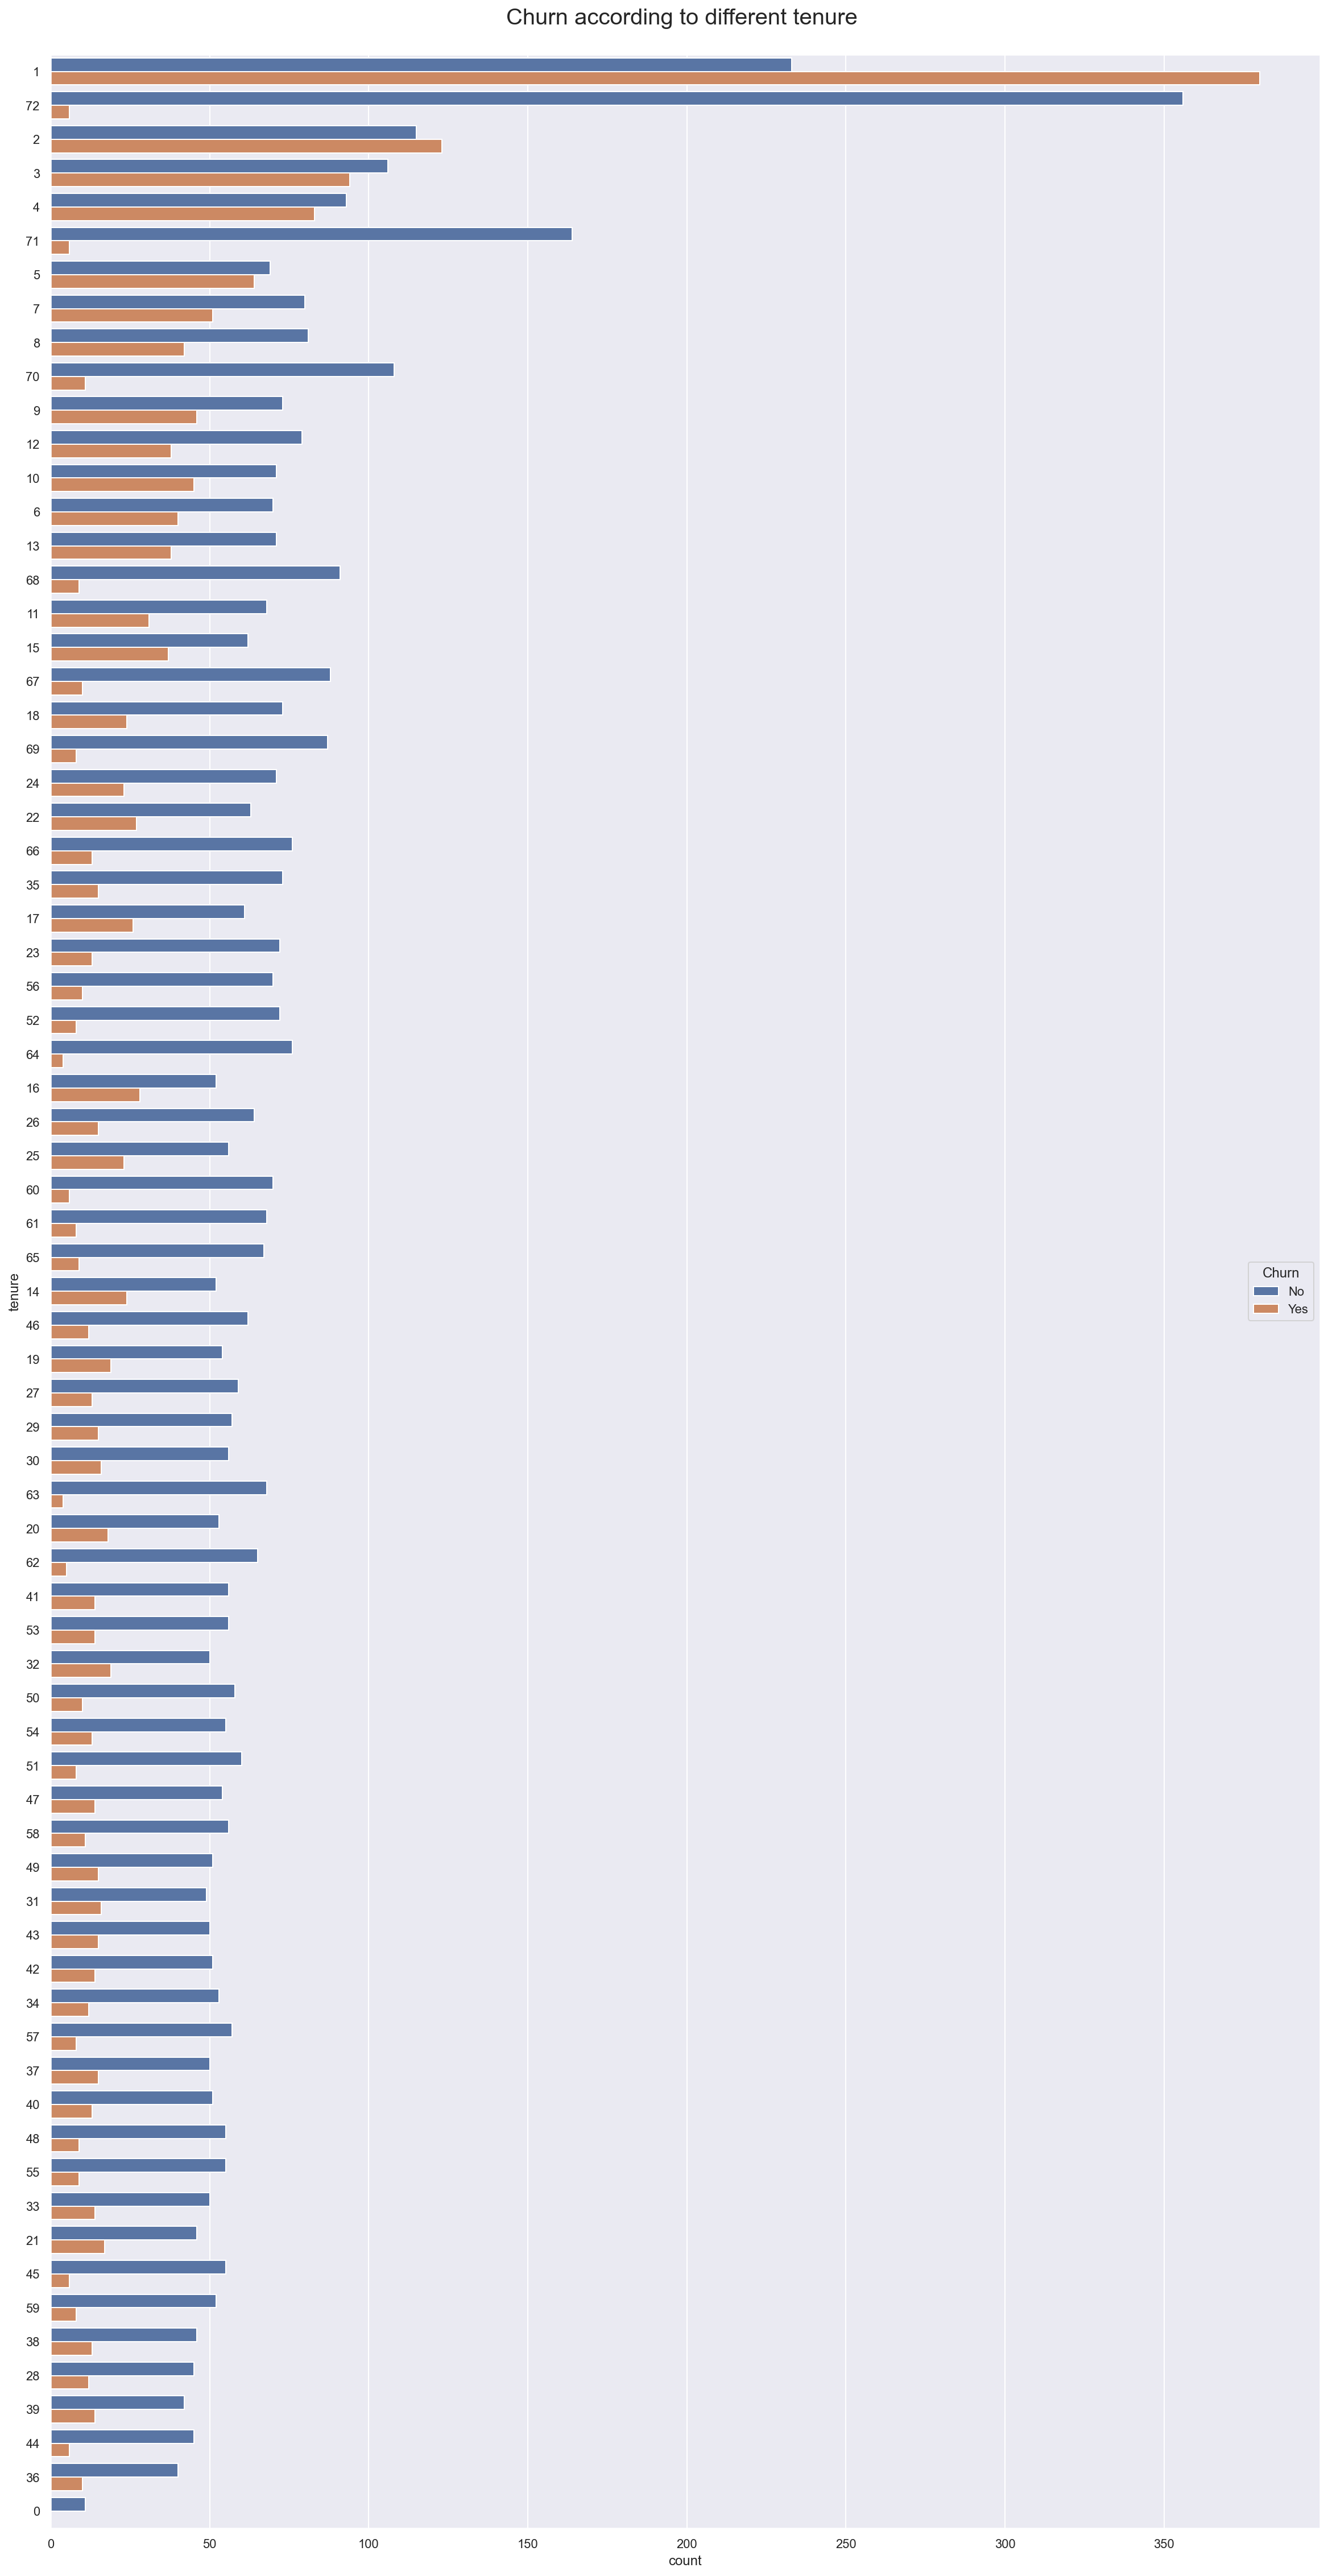

In [107]:
hue = 'Churn'

y = 'tenure'
plt.figure(figsize=(20,40))
sns.set(style='darkgrid')
sns.countplot(hue = hue , y = y,
              data = df,
              order = df['tenure'].value_counts().index)
plt.title(f"Churn according to different {y} \n", fontsize = 20)
plt.show()



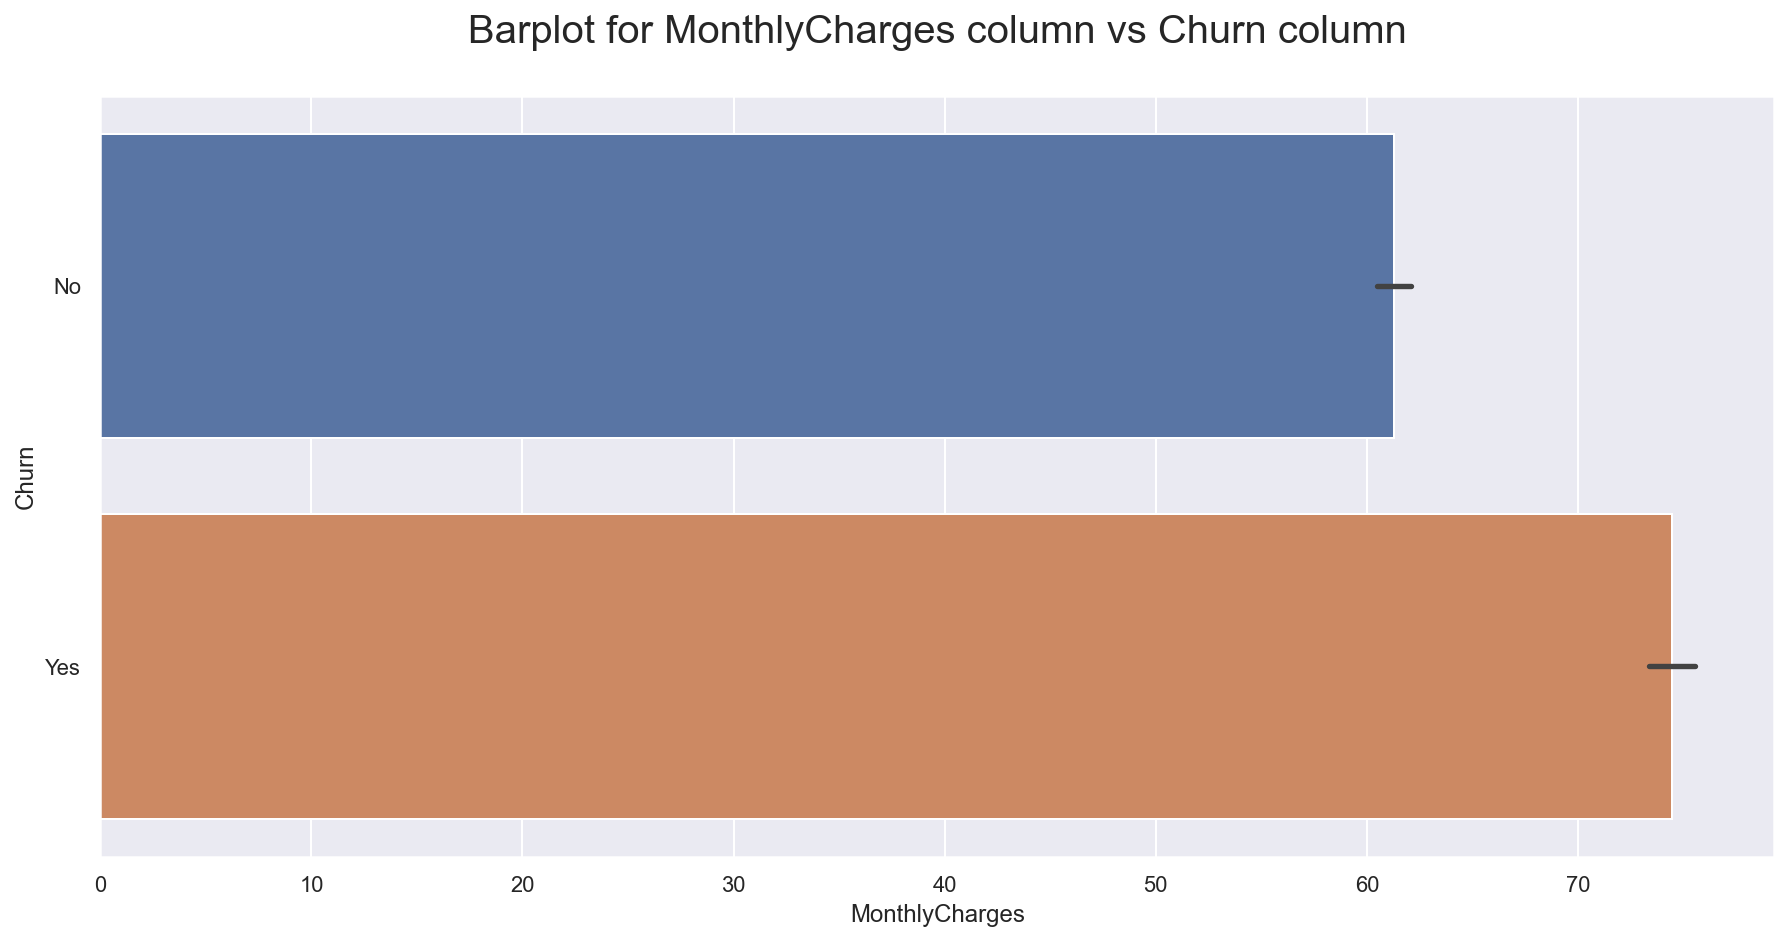

In [115]:
y = 'Churn'

x = 'MonthlyCharges'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

In [121]:
#Churn is same with both Male & Female.
#Churn is comparitively high with Non-Senior Citizens.
#Churn is more comparitively consumers without parnters.
#Churn is more comparitively consumers without Dependents.
#Churn is more comparitively consumers with PhoneService.
#Churn is more comparitively consumers with and without Multiple lines when compared to No-Phone Service.
#Churn is more comparitively consumers with Fiber Optic Internet Connection.
#Churn is more comparitively consumers without OnlineSecurity Service.
#Churn is more comparitively consumers without OnlineBackup Service.
#Churn is more comparitively consumers without DeviceProtection when compared to consumers with DeviceProtection.
#Churn is more comparitively consumers without TechSupport.
#Churn is more comparitively consumers without Streaming TV when compared with Consumers with StreamingTV Option.
#Churn is more comparitively consumers without Streaming Movies when compared with Consumers with StreamingMovies Option.
#Churn is more comparitively consumers on Month on Month Contract and ver few when it comes to Two Year Contract.
#Churn is more comparitively consumers with Paperless Billing when compared to without Paperless Billing.
#Churn is more comparitively consumers with Electronic Check Payment Method
#Churn is more cosnumers with 1 year, 2year tenure.
#Chrun is lower when monthly charges is lesser.

# Encoding the categorical object datatype columns

In [123]:
# Label Encoder

le = LabelEncoder()
df1["Churn"] = le.fit_transform(df1["Churn"])
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [125]:
# Ordinal Encoder

oe = OrdinalEncoder()
def ordinal_encode(df1, column):
    df1[column] = oe.fit_transform(df1[column])
    return df1

df1=ordinal_encode(df1, ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'SeniorCitizen',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0
1,1.0,0.0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0
2,1.0,0.0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1
3,1.0,0.0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0
4,0.0,0.0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1


In [126]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   float64
 1   SeniorCitizen     7021 non-null   float64
 2   Partner           7021 non-null   float64
 3   Dependents        7021 non-null   float64
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   float64
 6   MultipleLines     7021 non-null   float64
 7   InternetService   7021 non-null   float64
 8   OnlineSecurity    7021 non-null   float64
 9   OnlineBackup      7021 non-null   float64
 10  DeviceProtection  7021 non-null   float64
 11  TechSupport       7021 non-null   float64
 12  StreamingTV       7021 non-null   float64
 13  StreamingMovies   7021 non-null   float64
 14  Contract          7021 non-null   float64
 15  PaperlessBilling  7021 non-null   float64
 16  PaymentMethod     7021 non-null   float64


In [128]:
#Checking for Skewness

df1.skew()

#below results shows there is a skewness.

gender             -0.017381
SeniorCitizen       1.829987
Partner             0.061857
Dependents          0.870322
tenure              0.235542
PhoneService       -2.721300
MultipleLines       0.112816
InternetService     0.208589
OnlineSecurity      0.416182
OnlineBackup        0.181338
DeviceProtection    0.185268
TechSupport         0.401511
StreamingTV         0.026366
StreamingMovies     0.012488
Contract            0.626004
PaperlessBilling   -0.377214
PaymentMethod      -0.166267
MonthlyCharges     -0.224097
TotalCharges        0.959910
Churn               1.068139
dtype: float64

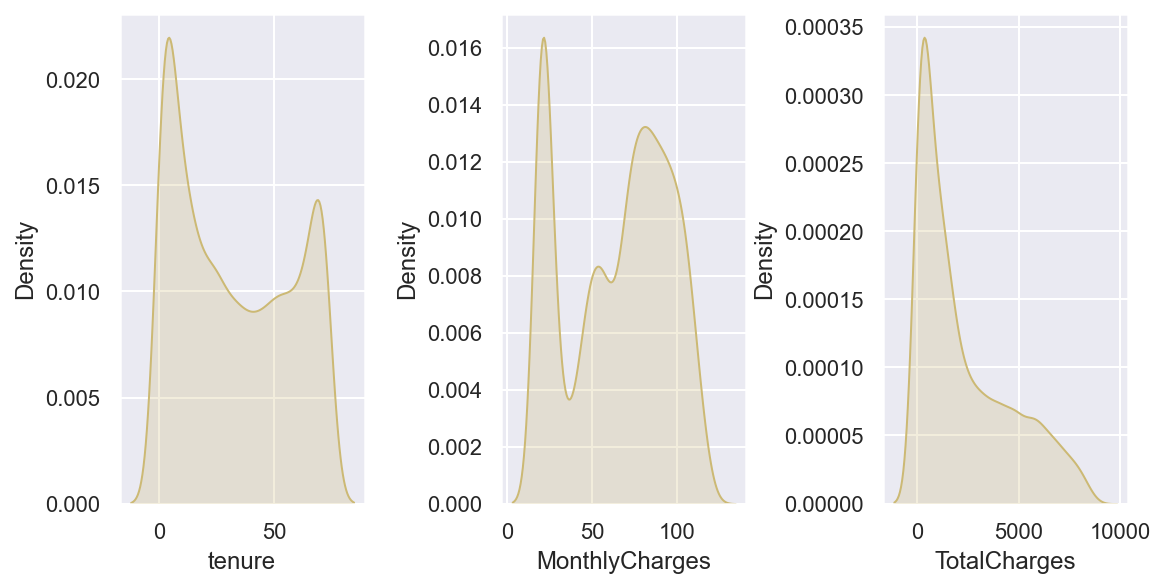

In [130]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(8,4))
index = 0
ax = ax.flatten()
for col, value in df1[number_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

# Using Log Transform to fix skewness

In [132]:
for col in number_datatype:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(df1[col])

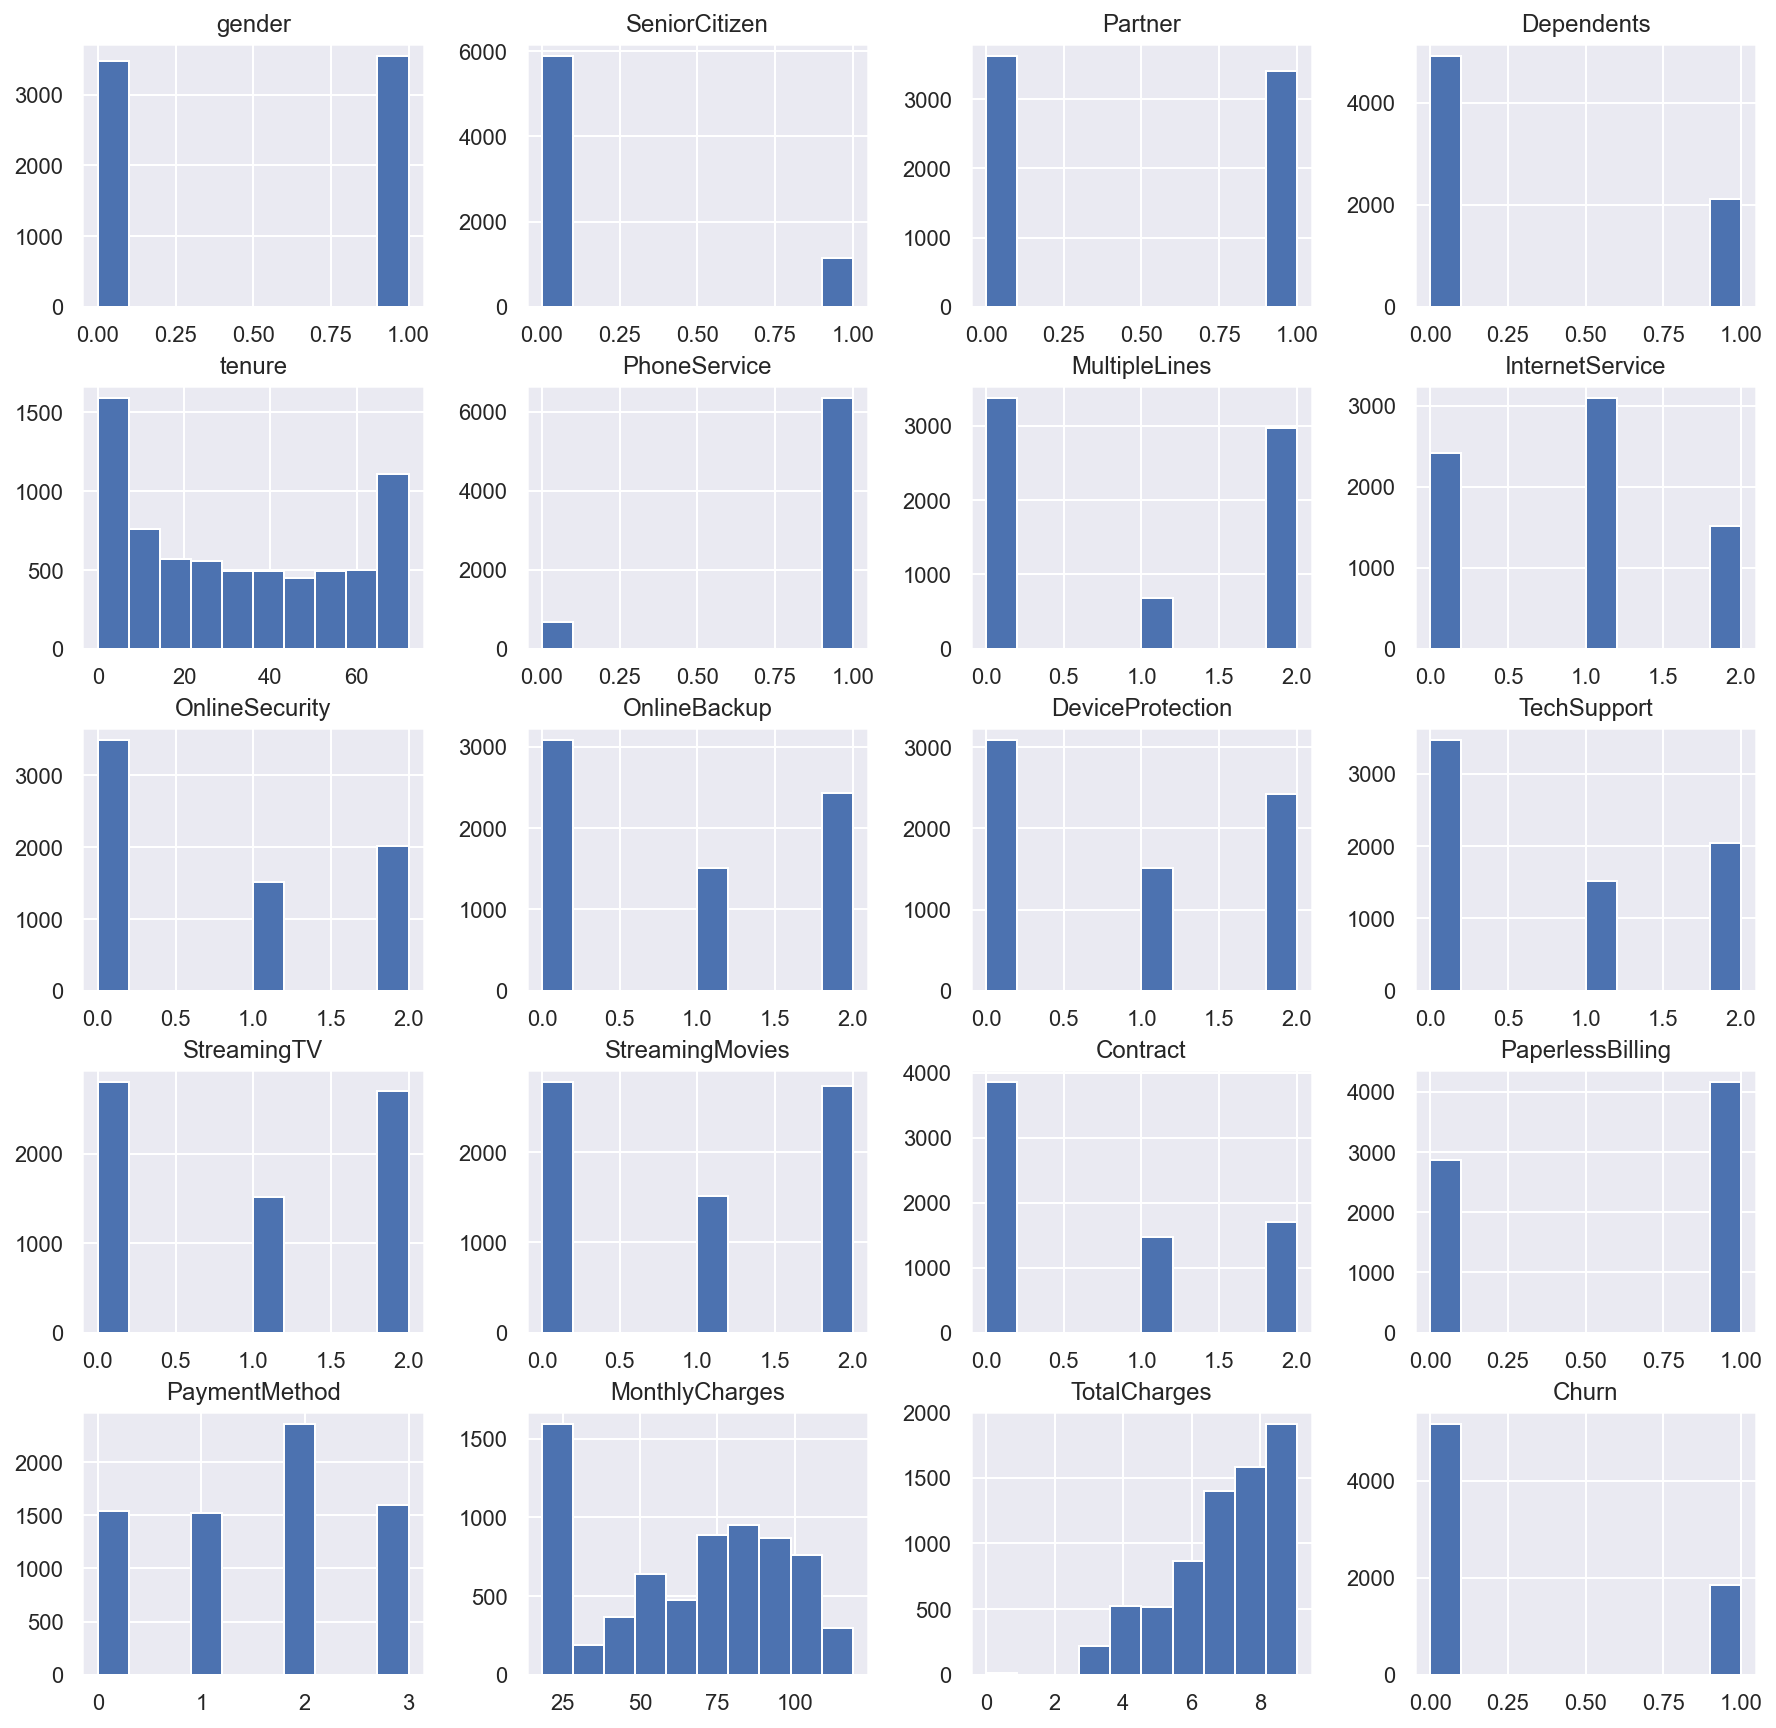

In [133]:
df1.hist(figsize=(15,15))
plt.show()

#histogram for all the columns after updating the columns to number data type

# Correlation Bar Plot comparing features with our label

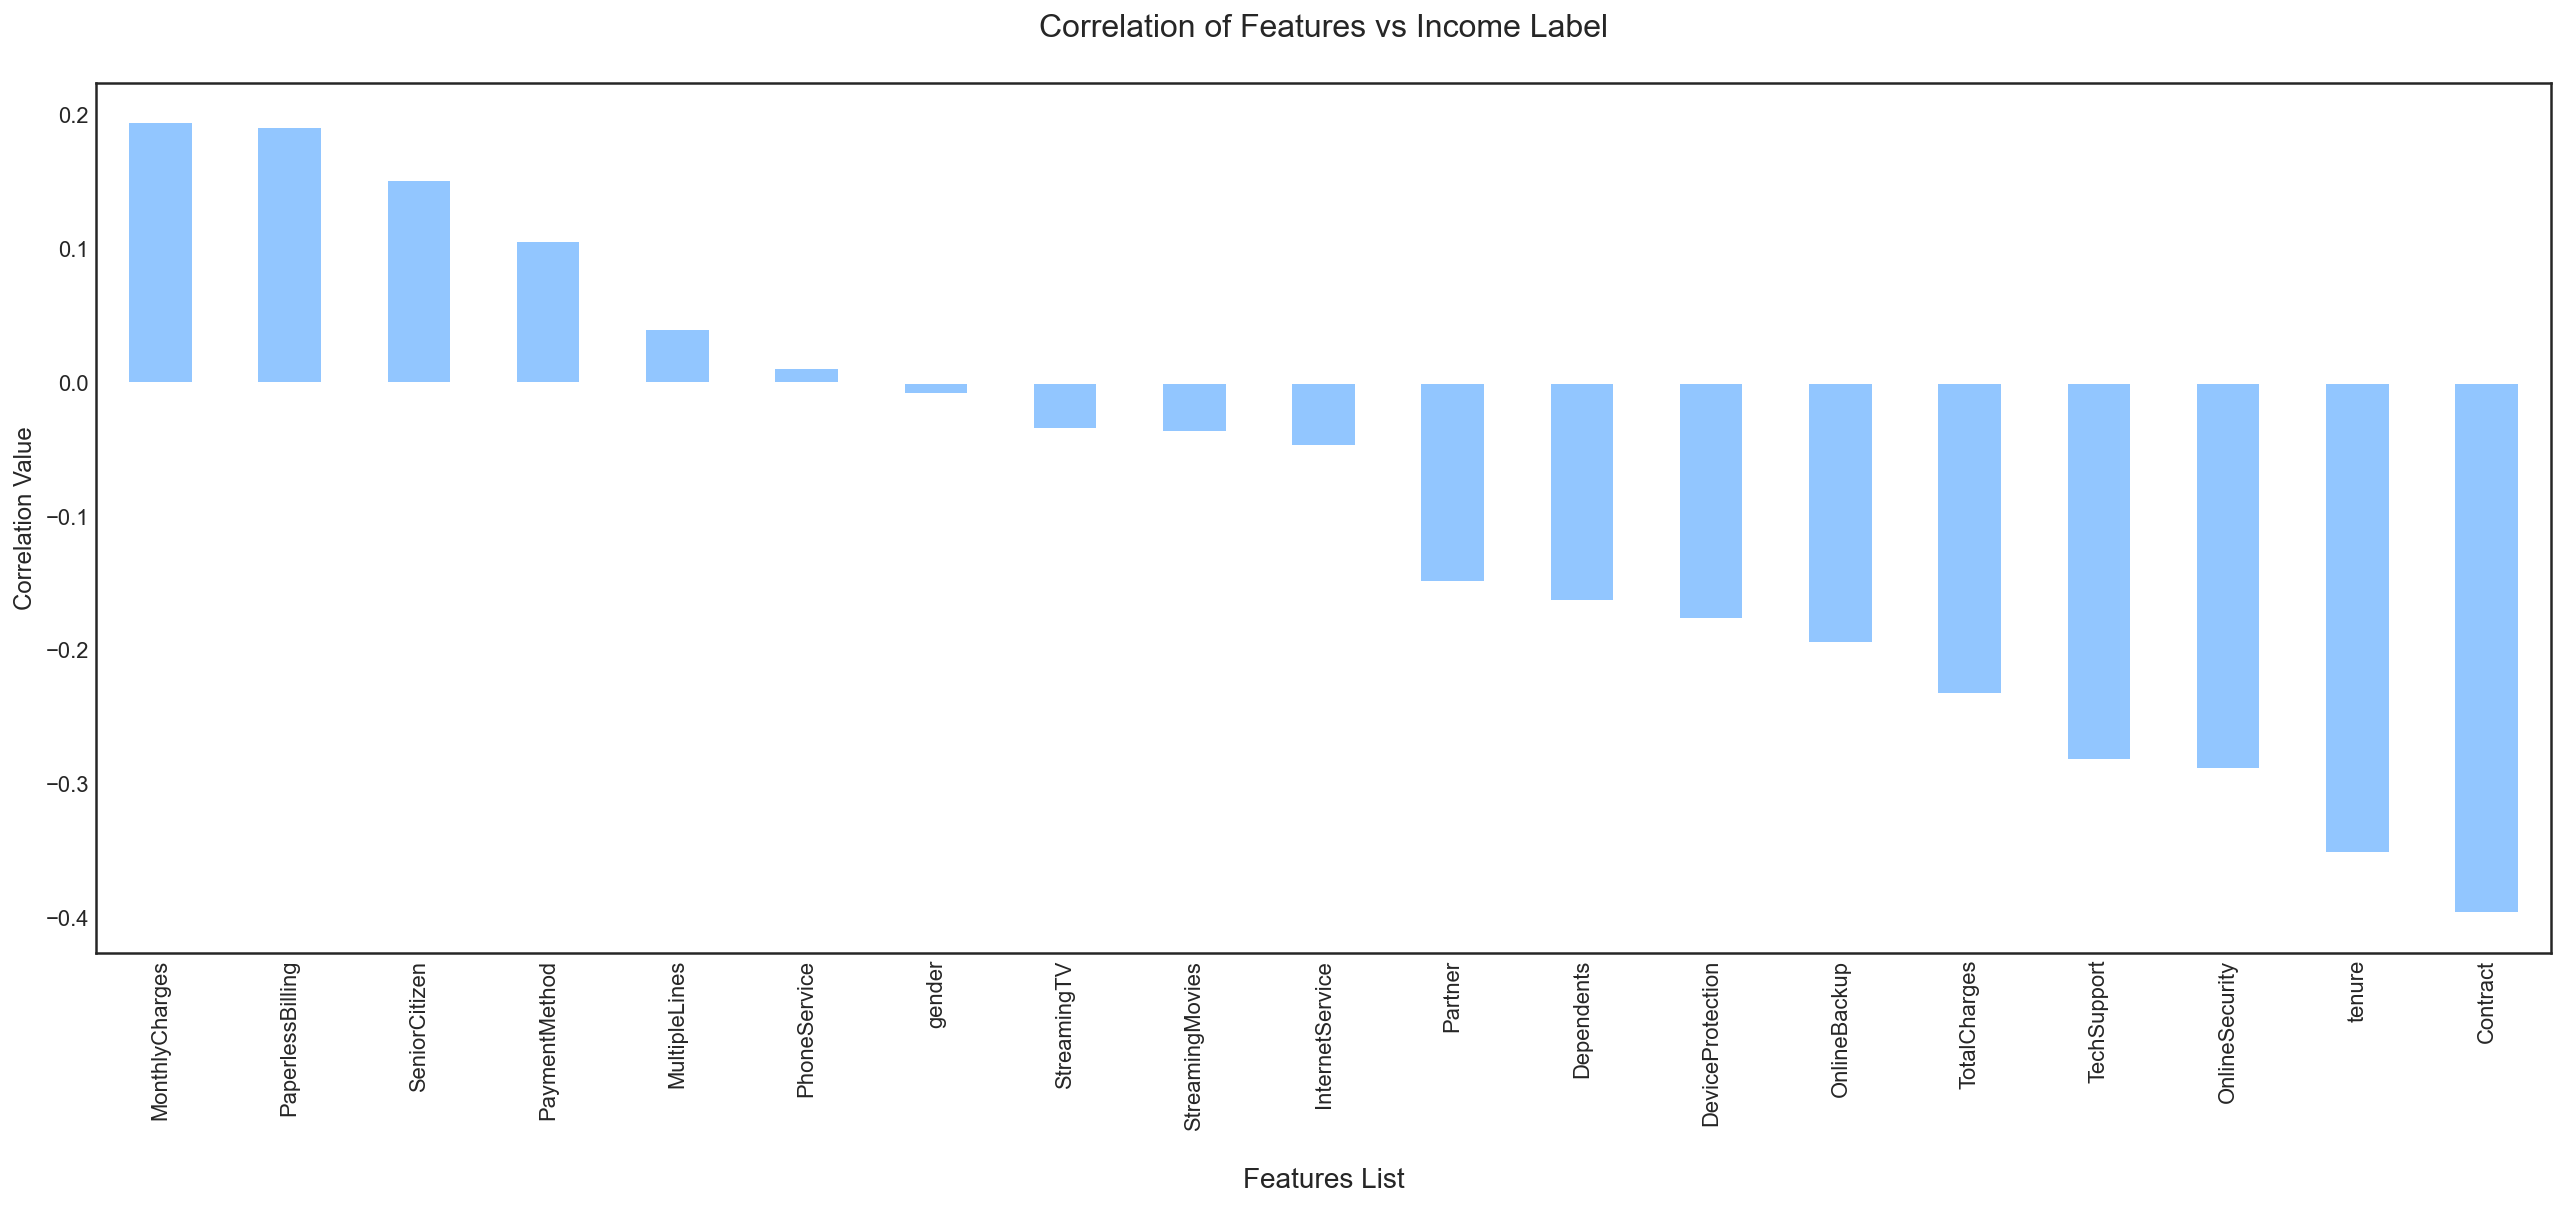

In [138]:
plt.style.use('seaborn-white')

df1_corr = df1.corr()
plt.figure(figsize=(22,8))
df1_corr['Churn'].sort_values(ascending=False).drop('Churn').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

In [139]:
#we see that columns monthly charges, paperless billing, senior citizen, payment method, multiple lines and phone service are positively correlated with our target label churn while all the remaining features are negatively correlated with our label column.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [140]:
X = df1.drop('Churn', axis=1)
Y = df1['Churn']

In [141]:
Y.value_counts()

0    5164
1    1857
Name: Churn, dtype: int64

# Resolving the class imbalance issue in our label column

In [142]:
#using SMOTE method for resolving the Class Imbalance

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [143]:
Y.value_counts()

0    5164
1    5164
Name: Churn, dtype: int64

# Feature Scaling

In [144]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.055684,-0.513334,1.163293,-0.606796,-1.119011,-3.164652,0.027295,-1.275103,-0.782696,1.367358,-0.927919,-0.788629,-1.071902,-1.084542,-0.669580,0.765449,0.367571,-1.328684,-2.079588
1,1.039772,-0.513334,-0.929031,-0.606796,0.257331,0.320186,-1.040790,-1.275103,1.651578,-0.928715,1.363907,-0.788629,-1.071902,-1.084542,0.639052,-1.398589,1.384265,-0.386416,0.489066
2,1.039772,-0.513334,-0.929031,-0.606796,-1.077303,0.320186,-1.040790,-1.275103,1.651578,1.367358,-0.927919,-0.788629,-1.071902,-1.084542,-0.669580,0.765449,1.384265,-0.494203,-1.290924
3,1.039772,-0.513334,-0.929031,-0.606796,0.716112,-3.164652,0.027295,-1.275103,1.651578,-0.928715,1.363907,1.631042,-1.071902,-1.084542,0.639052,-1.398589,-1.665817,-0.895797,0.472760
4,-1.055684,-0.513334,-0.929031,-0.606796,-1.077303,0.320186,-1.040790,0.214016,-0.782696,-0.928715,-0.927919,-0.788629,-1.071902,-1.084542,-0.669580,0.765449,0.367571,0.091672,-1.081569


# Finding best random state for building our Classification Models

In [145]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 79.93803253292022 on Random State 692


# Feature importance bar graph

,Importance
Features,
Contract,0.157
TotalCharges,0.122
MonthlyCharges,0.121
tenure,0.110
OnlineSecurity,0.069
PaymentMethod,0.061
TechSupport,0.060
PaperlessBilling,0.058
gender,0.034


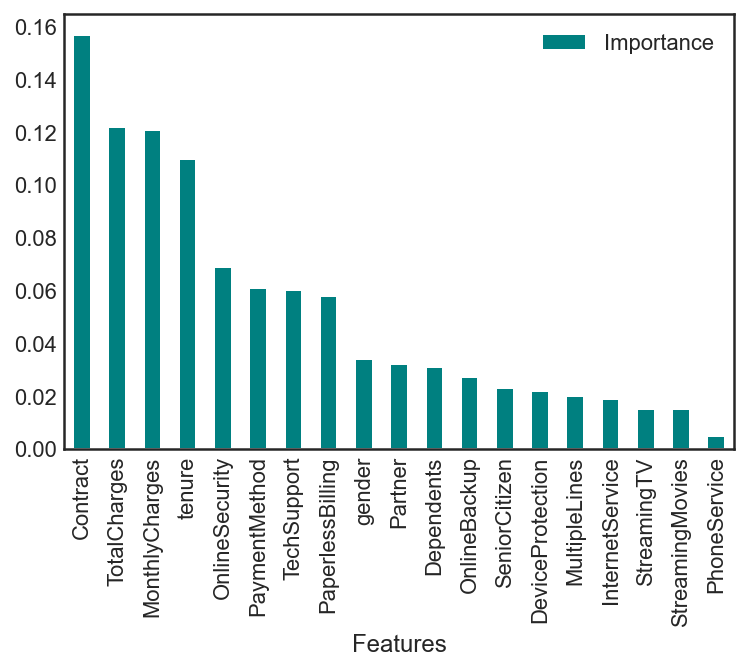

In [147]:
rf=RandomForestClassifier()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

In [148]:
#Here with the help of RandomForestClassifier able to list down the importance or priority given to a column as per it's involvement or weightage in predicting our label.

# Machine Learning Model for Classification with Evaluation Metrics

In [149]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=10)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [150]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78      1283
           1       0.77      0.82      0.79      1299

    accuracy                           0.79      2582
   macro avg       0.79      0.79      0.79      2582
weighted avg       0.79      0.79      0.79      2582

Accuracy Score: 78.58249419054995
Cross Validation Score: 77.06240785319329

Accuracy Score - Cross Validation Score is 1.520086337356659


In [151]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1283
           1       0.83      0.83      0.83      1299

    accuracy                           0.83      2582
   macro avg       0.83      0.83      0.83      2582
weighted avg       0.83      0.83      0.83      2582

Accuracy Score: 82.92021688613478
Cross Validation Score: 81.89476102187146

Accuracy Score - Cross Validation Score is 1.0254558642633214


In [152]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1283
           1       0.81      0.81      0.81      1299

    accuracy                           0.81      2582
   macro avg       0.81      0.81      0.81      2582
weighted avg       0.81      0.81      0.81      2582

Accuracy Score: 81.02246320681643
Cross Validation Score: 81.03317402239418

Accuracy Score - Cross Validation Score is -0.010710815577752442


In [153]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1283
           1       0.89      0.85      0.87      1299

    accuracy                           0.87      2582
   macro avg       0.87      0.87      0.87      2582
weighted avg       0.87      0.87      0.87      2582

Accuracy Score: 87.0255615801704
Cross Validation Score: 84.98397436648706

Accuracy Score - Cross Validation Score is 2.041587213683343


In [154]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.65      0.74      1283
           1       0.72      0.89      0.80      1299

    accuracy                           0.77      2582
   macro avg       0.79      0.77      0.77      2582
weighted avg       0.79      0.77      0.77      2582

Accuracy Score: 77.07203718048025
Cross Validation Score: 76.94647105564788

Accuracy Score - Cross Validation Score is 0.12556612483237473


In [155]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1283
           1       0.89      0.85      0.87      1299

    accuracy                           0.87      2582
   macro avg       0.87      0.87      0.87      2582
weighted avg       0.87      0.87      0.87      2582

Accuracy Score: 87.06429124709527
Cross Validation Score: 85.75841773531569

Accuracy Score - Cross Validation Score is 1.3058735117795806


In [159]:
import xgboost as xgb
import lightgbm as lgb

# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1283
           1       0.88      0.83      0.85      1299

    accuracy                           0.86      2582
   macro avg       0.86      0.86      0.86      2582
weighted avg       0.86      0.86      0.86      2582

Accuracy Score: 85.5151045701007
Cross Validation Score: 83.5803051363128

Accuracy Score - Cross Validation Score is 1.9347994337879015


In [160]:
# LGBM Classifier

model=lgb.LGBMClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1283
           1       0.89      0.83      0.86      1299

    accuracy                           0.86      2582
   macro avg       0.87      0.86      0.86      2582
weighted avg       0.87      0.86      0.86      2582

Accuracy Score: 86.32842757552285
Cross Validation Score: 84.30643955286679

Accuracy Score - Cross Validation Score is 2.0219880226560605


# Hyper parameter tuning on the best Classification ML Model

In [161]:
# Choosing Extra Trees Classifier since it has best Accuracy Score

fmod_param = {'criterion' : ['gini', 'entropy'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [10, 42, 1000],
              'max_depth' : [0, 15, 30],
              'n_estimators' : [100, 200, 300]
             }

In [162]:
GSCV = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)

In [163]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 15, 30],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [10, 42, 1000]})

In [164]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 1000}

In [165]:
Final_Model = ExtraTreesClassifier(criterion='gini', max_depth=30, n_estimators=100, n_jobs=-2, random_state=42)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 87.06429124709527


In [ ]:
#there is no change in the Hyper Tuning.